<a href="https://colab.research.google.com/github/ahmedshaik982/Bike_Sharing_Demand_Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')
import datetime
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
# Mounting to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the data 
data = pd.read_csv('/content/drive/My Drive/files/SeoulBikeData.csv',encoding='latin1')
data.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0         -5.20000           37   
1  01/12/2017                204     1         -5.50000           38   
2  01/12/2017                173     2         -6.00000           39   
3  01/12/2017                107     3         -6.20000           40   
4  01/12/2017                 78     4         -6.00000           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0           2.20000              2000                  -17.60000   
1           0.80000              2000                  -17.60000   
2           1.00000              2000                  -17.70000   
3           0.90000              2000                  -17.60000   
4           2.30000              2000                  -18.60000   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                  0.00000       0.00000        0.00000  Winter  No Holiday   
1                  0.00000       0.00000        0.00000  Winter  No Holiday   
2                  0.00000       0.00000        0.00000  Winter  No Holiday   
3                  0.00000       0.00000        0.00000  Winter  No Holiday   
4                  0.00000       0.00000        0.00000  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
data.shape

(8760, 14)

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
# Getiing the info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
# checking for duplicated values
data.duplicated().sum()

0

Hence, the data has no duplicated values

In [ ]:
# Checking for null values
data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Hence, the data has no null values. So we can deep dive into exploratory data analysis.

# **Exploratory Data Analysis**

In EDA, we explore the following things:


*   All the numerical features

*   All the categorical features

*   Distribution of numerical features

*   Cardinality of categorical features
*   Outliers


*   Relationship between independent features and dependent feature (Rented Bike Count)




In [ ]:
# Converting Date column which is in string datatype to datetime datatype
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True)

In [ ]:
data['Hour'] = data['Hour'].astype(str)

In [ ]:
data['Day'] = data['Date'].dt.day_name()

In [ ]:
# Storing list of columns
col = data.columns
col

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Day'],
      dtype='object')

In [ ]:
data.head()

Date  Rented Bike Count Hour  Temperature(°C)  Humidity(%)  \
0 2017-01-12                254    0         -5.20000           37   
1 2017-01-12                204    1         -5.50000           38   
2 2017-01-12                173    2         -6.00000           39   
3 2017-01-12                107    3         -6.20000           40   
4 2017-01-12                 78    4         -6.00000           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0           2.20000              2000                  -17.60000   
1           0.80000              2000                  -17.60000   
2           1.00000              2000                  -17.70000   
3           0.90000              2000                  -17.60000   
4           2.30000              2000                  -18.60000   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                  0.00000       0.00000        0.00000  Winter  No Holiday   
1                  0.00000       0.00000        0.00000  Winter  No Holiday   
2                  0.00000       0.00000        0.00000  Winter  No Holiday   
3                  0.00000       0.00000        0.00000  Winter  No Holiday   
4                  0.00000       0.00000        0.00000  Winter  No Holiday   

  Functioning Day       Day  
0             Yes  Thursday  
1             Yes  Thursday  
2             Yes  Thursday  
3             Yes  Thursday  
4             Yes  Thursday

In [ ]:
# Date feature
date_feat = [feature for feature in col if data[feature].dtype == 'datetime64[ns]']
date_feat

['Date']

In [ ]:
# Getting the numerical features
num_feat = [feature for feature in col if data[feature].dtype != 'object' and data[feature].dtype != 'datetime64[ns]']
num_feat

['Rented Bike Count',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [ ]:
# Getting the categorical features
cat_feat = [feature for feature in col if data[feature].dtype == 'O' ]
cat_feat

['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'Day']

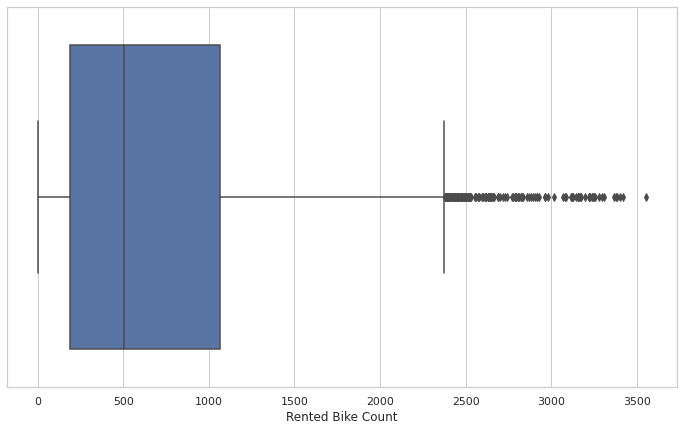

In [ ]:
# Visualizing box plot of dependent feature (Rented Bike Count)
plt.figure(figsize = (12,7))
sns.boxplot(x = 'Rented Bike Count', data = data)
plt.show()

From the above box plot we can observe that count mostly ranges from 200 to 1100. And outliers are also present which are above 2400.

In [ ]:
# Distribution of numerical features
# Creating a function which takes column name as attribute and returns the distribution plot
def dist_num_feat(feature):
  plt.figure(figsize = (8,6))
  sns.distplot(data[feature])
  plt.title(f'Distribution plot of {feature}')
  plt.show()

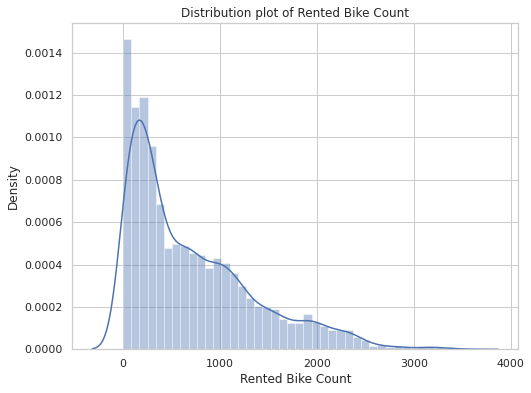

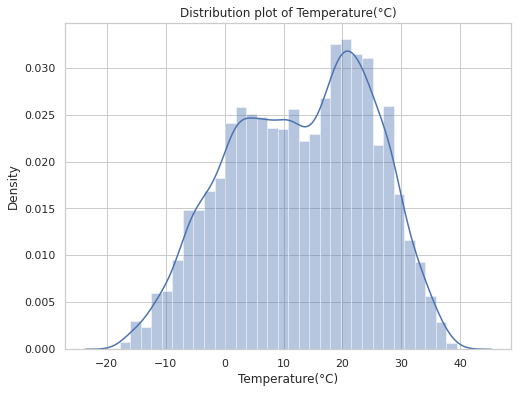

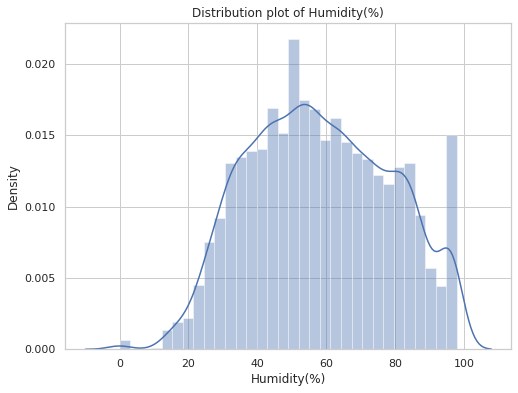

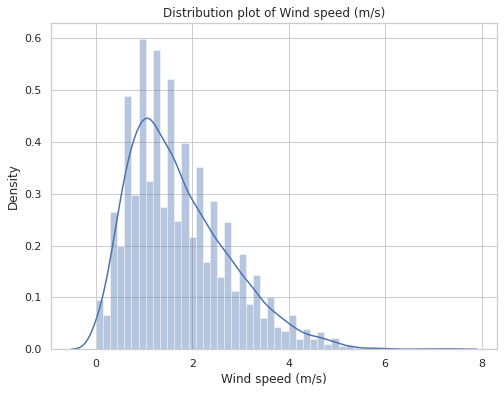

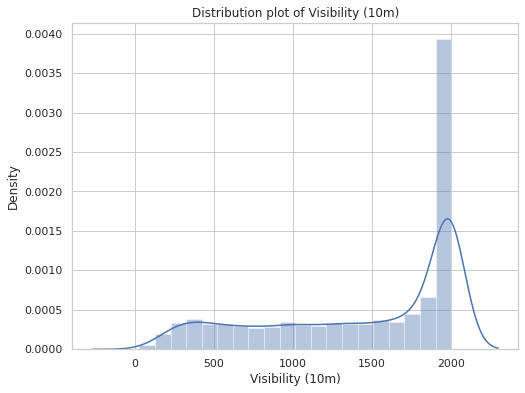

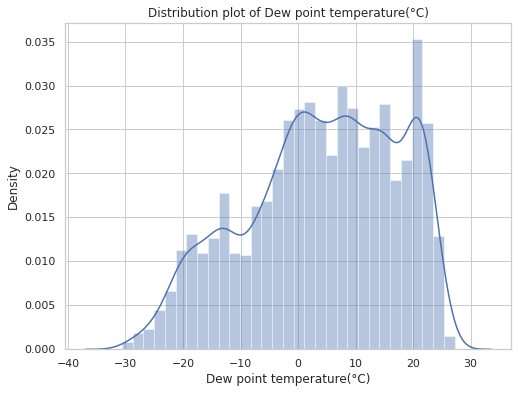

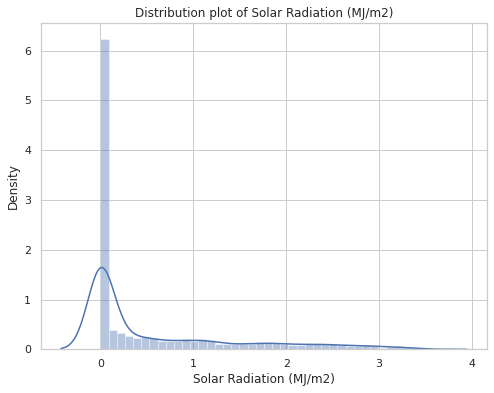

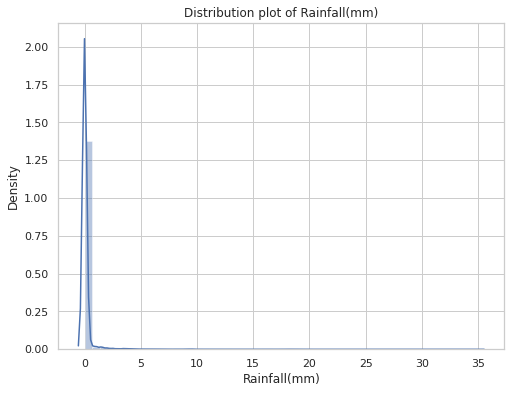

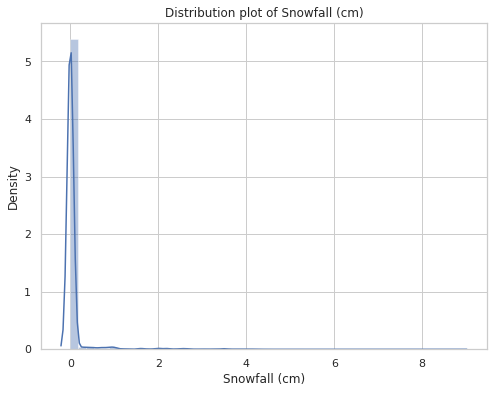

In [ ]:
# Creating distribution plots for all numerical features
for feature in num_feat:
  dist_num_feat(feature)



*   Most number of the bike count ranges from 0 to 500.

*   Temperature mostly varies from 20 to 30
*   Humidity mostly varies from 20 to 100


*   Wind speed mostly varies from 2 to 4 m/s

*  Visibility of 2000 count is high.
*   Solar Radiation is mostly 0. And a few are in range of 1 to 4
*   Mostly there is no rainfall and snowfall. And a very few have rainfall and snowfall.






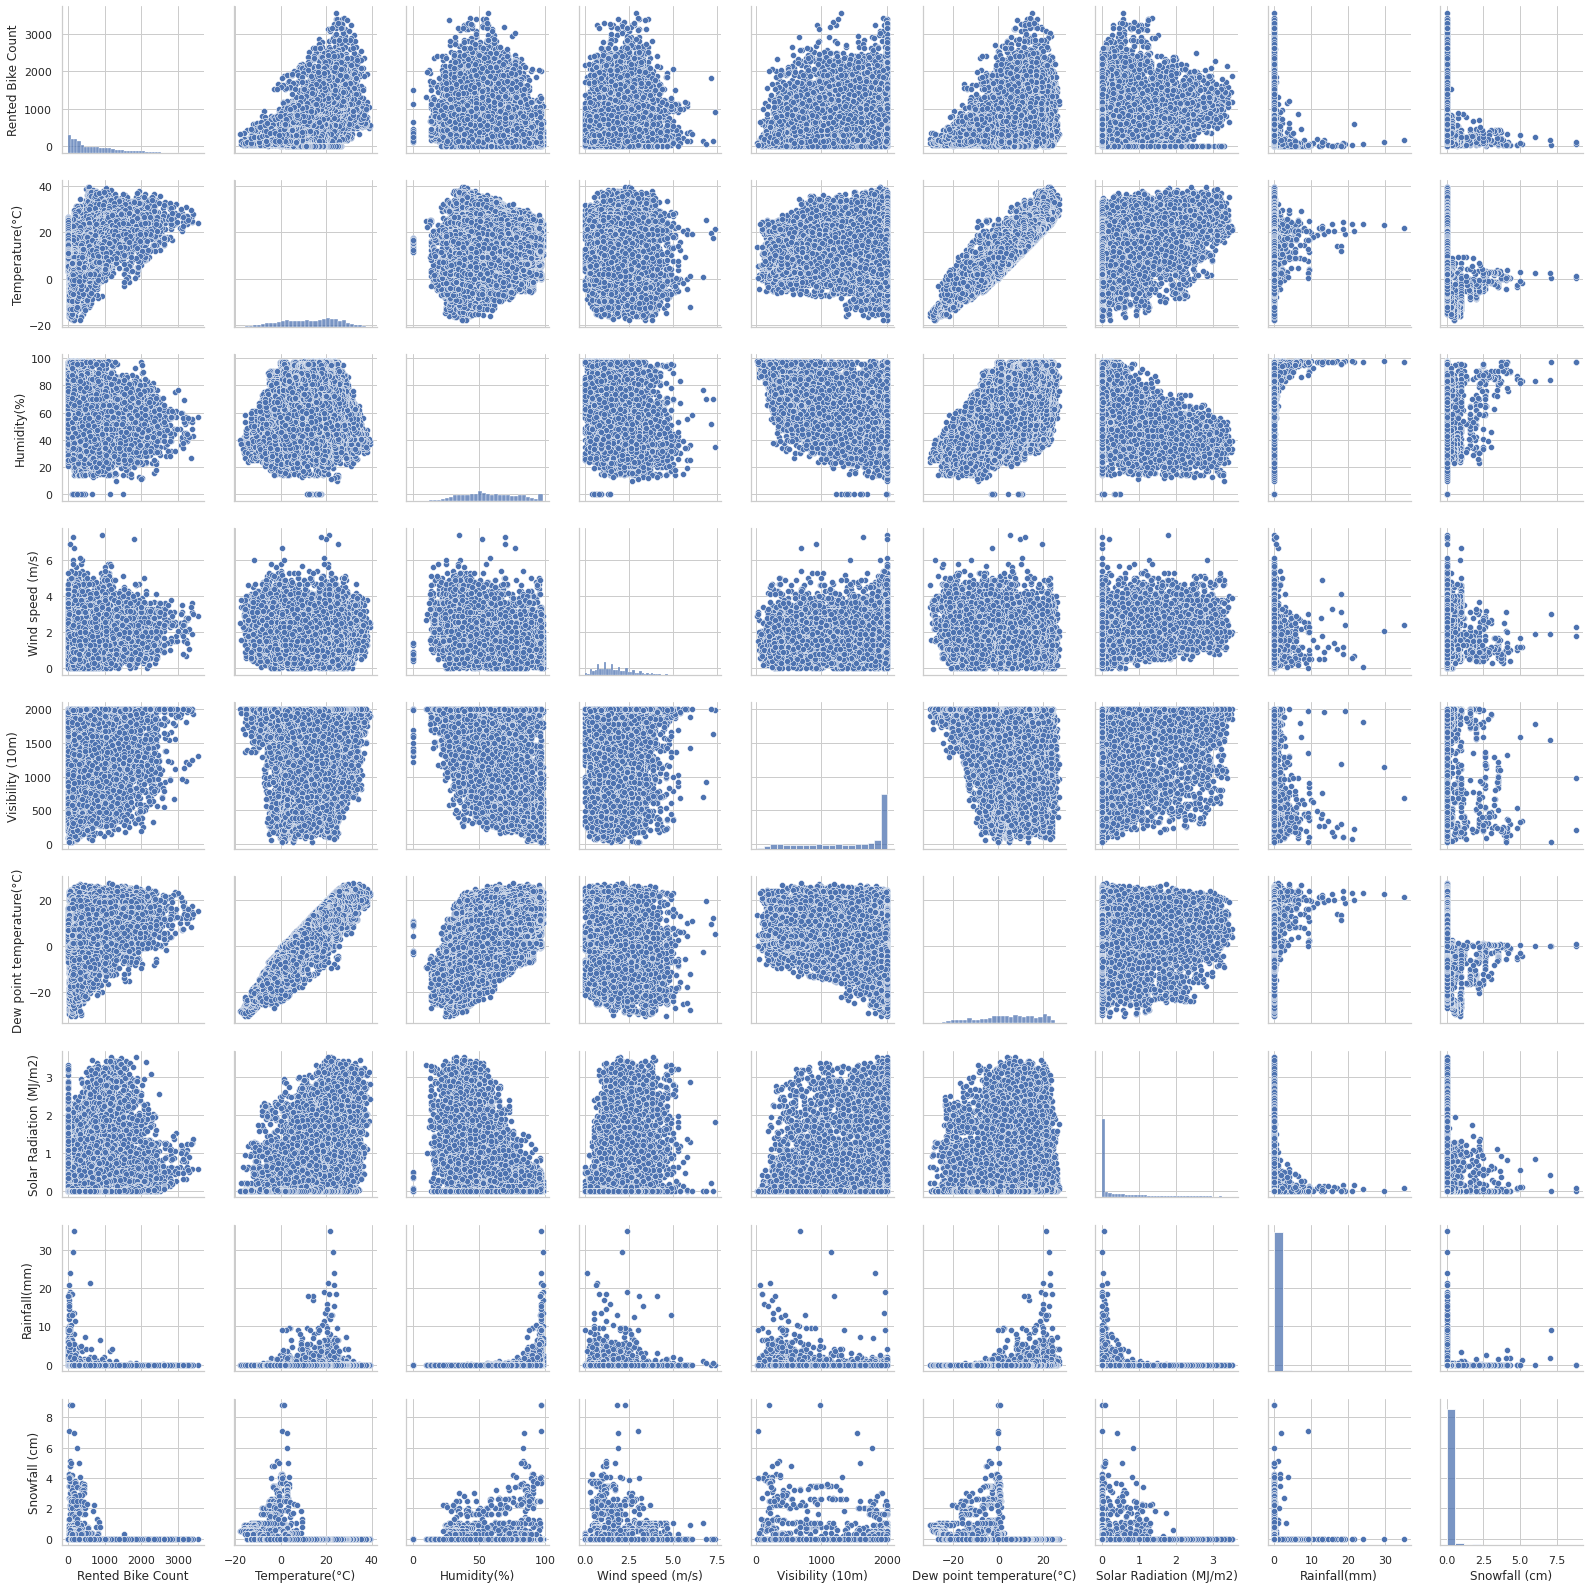

In [ ]:
# Plotting pair plot
sns.pairplot(data)

In [ ]:
# observing realtionship between independent and dependent feature
def reg_plot(feature):
  sns.regplot(x = data[feature], y = data['Rented Bike Count'] , data = data, fit_reg = True,  scatter_kws={"color": "blue"}, line_kws={"color": "red"})
  plt.title(f'{feature} vs Rented Bike Count')
  plt.show()


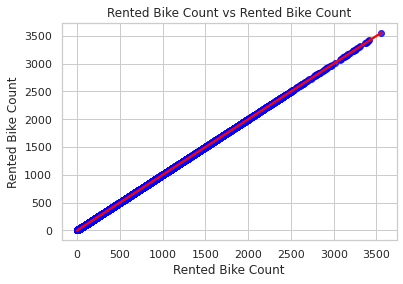

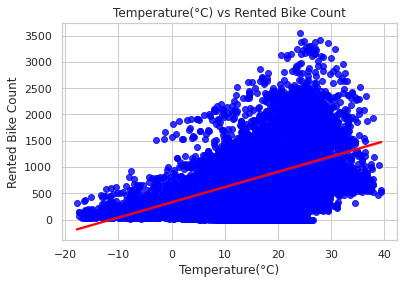

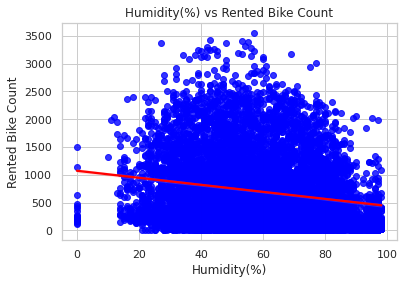

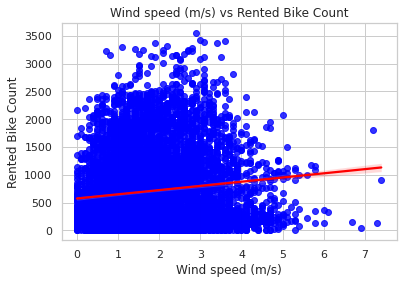

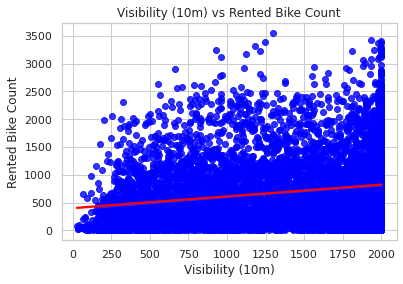

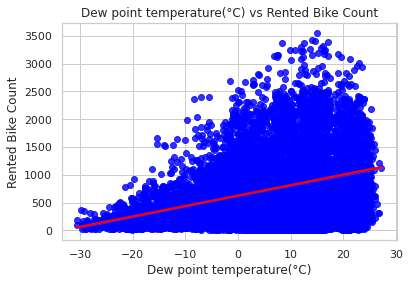

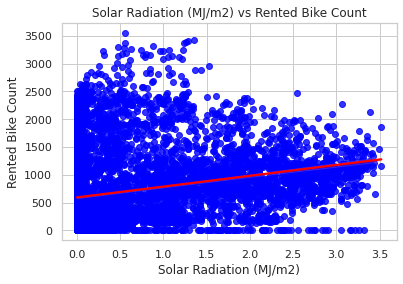

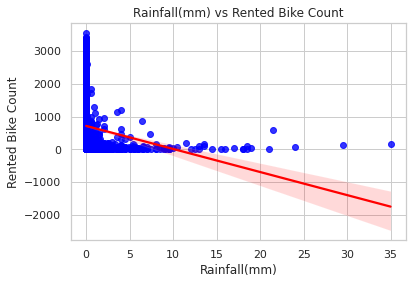

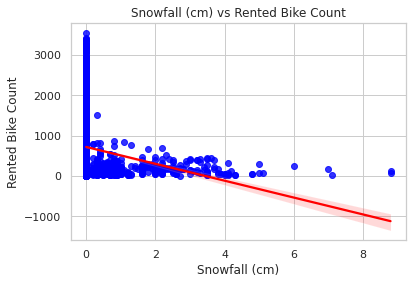

In [ ]:
# Plotting scatter plots between dependent feature and numerical features
for feature in num_feat:
  reg_plot(feature)
  print('\t'*2 )

From the above all scatter plots, the distribution between numerical features and dependent feature (Rented Bike Count) has been spread out entire area which means there is no specific relation between them.

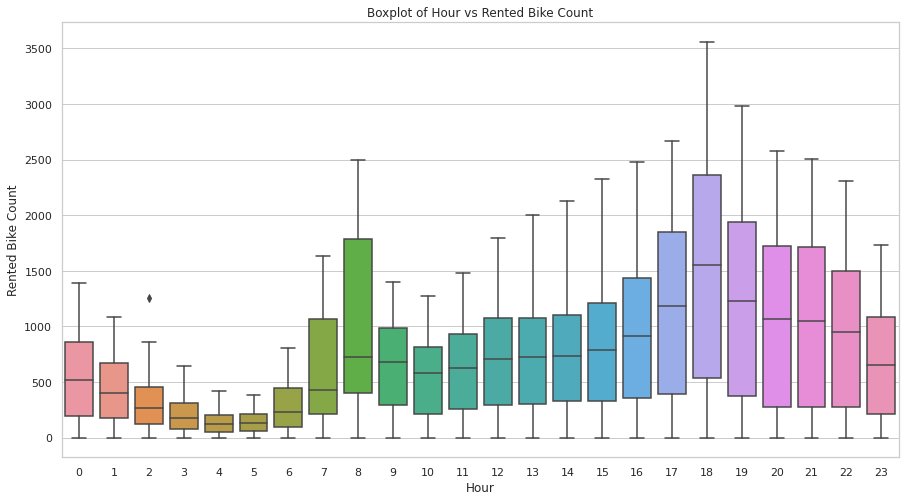

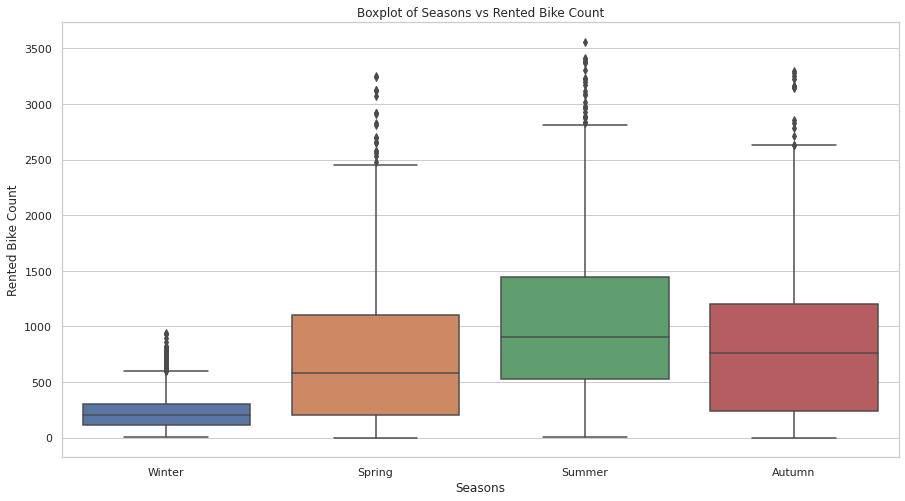

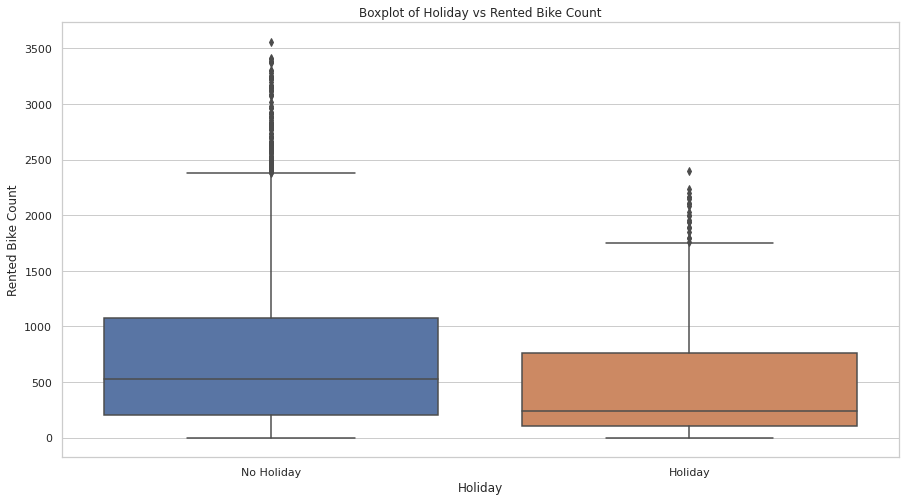

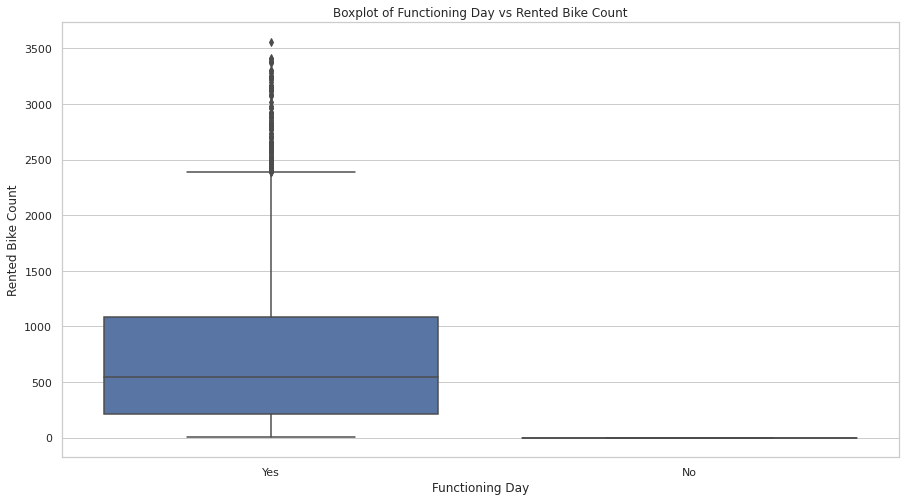

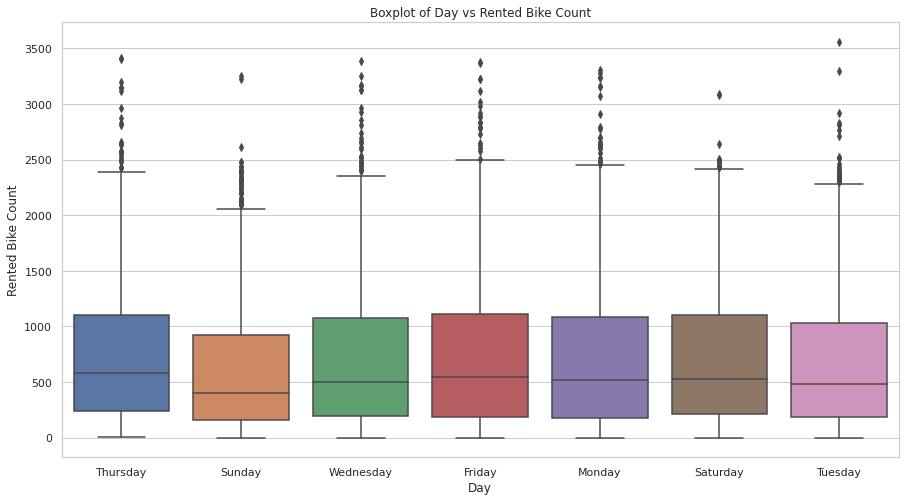

In [ ]:
# Relationship between categorical features and Dependent feature (Rented Bike Count)
for feature in cat_feat:
  plt.figure(figsize = (15, 8))
  sns.boxplot(x = feature, y = 'Rented Bike Count', data = data)
  plt.title(f'Boxplot of {feature} vs Rented Bike Count')
  plt.show()
  print('\t ')

From the above box plots, we can see there are various outliers present in categorical features.

In [ ]:
# Creating a dataframe of hours and their rented bike counts
hour_df = data.groupby('Hour')['Rented Bike Count'].sum().reset_index().sort_values(by = 'Rented Bike Count' , ascending = False)
hour_df

Hour  Rented Bike Count
10   18             548568
11   19             436229
9    17             415556
13   20             390172
14   21             376479
22    8             370731
8    16             339677
15   22             336821
7    15             302653
6    14             276971
5    13             267635
4    12             255296
16   23             244961
23    9             235784
21    7             221192
3    11             219311
0     0             197633
2    10             192655
1     1             155557
12    2             110095
20    6             104961
17    3              74216
19    5              50765
18    4              48396

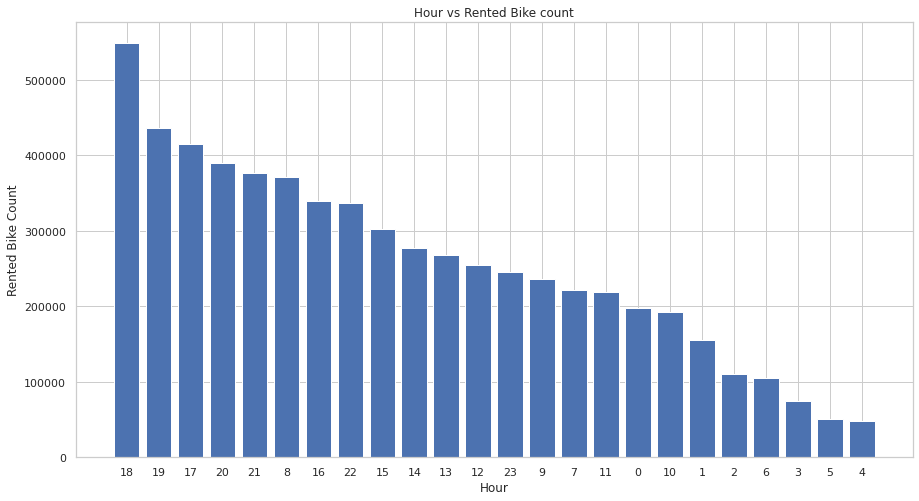

In [ ]:
# Plotting the above dataframe 
plt.figure(figsize = (15, 8))
plt.bar(hour_df['Hour'], hour_df['Rented Bike Count'])
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')
plt.title('Hour vs Rented Bike count')
plt.show()

From the above dataframe and visualizations, we can say that more number of bikes are rented in the hour of 18 followed by 19th hour. And the least is 4th hour

In [ ]:
# Variation of Seasons with Rented bike counts
season_df = data.groupby('Seasons')['Rented Bike Count'].mean().reset_index().sort_values(by = 'Rented Bike Count', ascending = False)
season_df

Seasons  Rented Bike Count
2  Summer         1034.07337
0  Autumn          819.59799
1  Spring          730.03125
3  Winter          225.54120

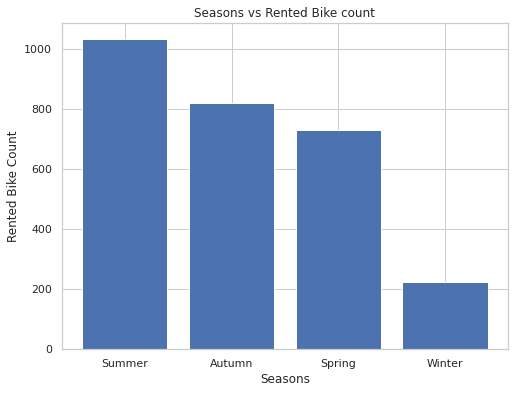

In [ ]:
# Plotting the above dataframe
plt.figure(figsize = (8, 6))
plt.bar(season_df['Seasons'], season_df['Rented Bike Count'])
plt.xlabel('Seasons')
plt.ylabel('Rented Bike Count')
plt.title('Seasons vs Rented Bike count')
plt.show()

From the above dataframe and visualization, we can say that in summer season, most number of bikes are rented and the least is winter season.

In [ ]:
# Variation of holiday with Rented bike counts
holiday_df = data.groupby('Holiday')['Rented Bike Count'].mean().reset_index().sort_values(by = 'Rented Bike Count', ascending = False)
holiday_df

Holiday  Rented Bike Count
1  No Holiday          715.22803
0     Holiday          499.75694

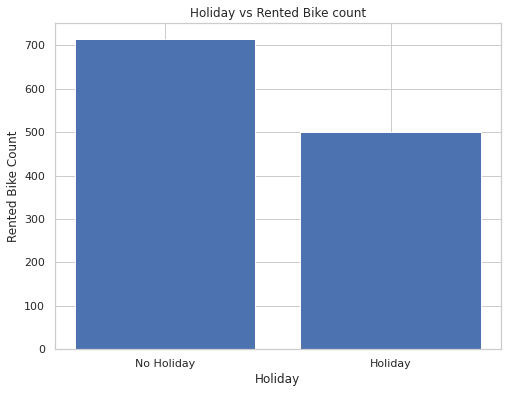

In [ ]:
# Plotting the above dataframe
plt.figure(figsize = (8, 6))
plt.bar(holiday_df['Holiday'], holiday_df['Rented Bike Count'])
plt.xlabel('Holiday')
plt.ylabel('Rented Bike Count')
plt.title('Holiday vs Rented Bike count')
plt.show()

From the above dataframe and visualization, we can say that in working days(No Holiday), most number of bikes are rented.

In [ ]:
# Variation of Day with Rented bike counts
day_df = data.groupby('Day')['Rented Bike Count'].mean().reset_index().sort_values(by = 'Rented Bike Count', ascending = False)
day_df

Day  Rented Bike Count
4   Thursday          743.80369
0     Friday          734.44935
2   Saturday          730.34856
1     Monday          719.63583
6  Wednesday          714.52123
5    Tuesday          678.36242
3     Sunday          615.96836

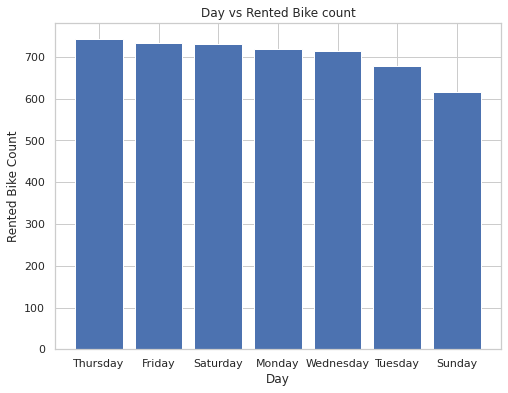

In [ ]:
# Plotting the above dataframe
plt.figure(figsize = (8, 6))
plt.bar(day_df['Day'], day_df['Rented Bike Count'])
plt.xlabel('Day')
plt.ylabel('Rented Bike Count')
plt.title('Day vs Rented Bike count')
plt.show()

From the above dataframe and visualization, we can say that Thursday has high count of rented bike and the least is Sunday.

In [ ]:
# Variation of Functioning Day with Rented bike counts
func_df = data.groupby('Functioning Day')['Rented Bike Count'].mean().reset_index().sort_values(by = 'Rented Bike Count', ascending = False)
func_df

Functioning Day  Rented Bike Count
1             Yes          729.15700
0              No            0.00000

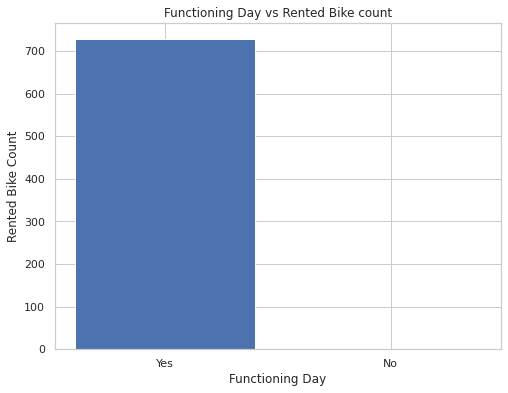

In [ ]:
# Plotting the above dataframe
plt.figure(figsize = (8, 6))
plt.bar(func_df['Functioning Day'], func_df['Rented Bike Count'])
plt.xlabel('Functioning Day')
plt.ylabel('Rented Bike Count')
plt.title('Functioning Day vs Rented Bike count')
plt.show()

From the above dataframe, In a functioning day, most number of bikes are rented.

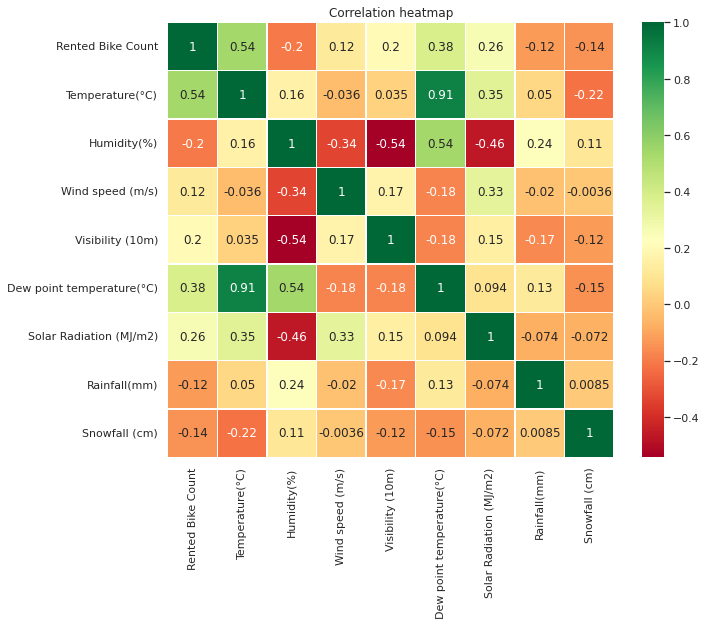

In [ ]:
# Visualize the correl,ation heatmap of numerical features
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(),  fmt=".2g",cmap='RdYlGn',linewidths=0.30,  annot = True)
plt.title('Correlation heatmap')
plt.show()

From the above correlation heatmap, we can observe that multicollinearity exits between two features namely Temperature and Dew Point Temperature. And


*   Humidity, Rainfall, Snowfall are negatively correlated with dependent variable. That means, if the above feature values increases, dependent feature value will decreases and viceversa.




# **Feature Engineering and Data Preprocessing:**


In this step, we will do the following:


*   Applying log to 'Rented Bike Count' column as it is positively skewed

*   Removing Outliers

*   One hot encoding to categorical features

*   MinMax Scaling the features
*   Spliting the data into train and test datasets





In [ ]:
# Creating the function which replaces 1 with 0 in dependent feature because we will apply log to the dependent feature
def log_dep(x):
  if x == 0:
    return 1
  else:
    return x

In [ ]:
# Applying log to dependent feature to reduce skewness
data['Rented Bike Count'] = data['Rented Bike Count'].apply(log_dep)

Text(0.5, 1.0, 'Distribution of Rented Bike Count')

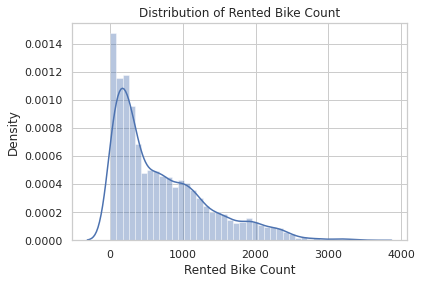

In [ ]:
sns.distplot(data['Rented Bike Count'])
plt.title('Distribution of Rented Bike Count')

In [ ]:
# Creating a new feature named weekend
def weekend(x):
  if x == 'Monday' or x == 'Tuesday' or x == 'Wednesday' or x == 'Thursday' or x == 'Friday':
    return 0
  else :
    return 1

data['weekend'] = data['Day'].apply(weekend)

# Dropping date feature as it is no more useful in further process
data.drop(['Date', 'Day'], axis = 1, inplace = True) 

In [ ]:
# Inspecting the data
data.head()

Rented Bike Count Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254    0         -5.20000           37           2.20000   
1                204    1         -5.50000           38           0.80000   
2                173    2         -6.00000           39           1.00000   
3                107    3         -6.20000           40           0.90000   
4                 78    4         -6.00000           36           2.30000   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                  -17.60000                  0.00000   
1              2000                  -17.60000                  0.00000   
2              2000                  -17.70000                  0.00000   
3              2000                  -17.60000                  0.00000   
4              2000                  -18.60000                  0.00000   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  weekend  
0       0.00000        0.00000  Winter  No Holiday             Yes        0  
1       0.00000        0.00000  Winter  No Holiday             Yes        0  
2       0.00000        0.00000  Winter  No Holiday             Yes        0  
3       0.00000        0.00000  Winter  No Holiday             Yes        0  
4       0.00000        0.00000  Winter  No Holiday             Yes        0

In [ ]:
# Apply log to dependent feature 
data['Rented Bike Count'] = np.log(data['Rented Bike Count'])

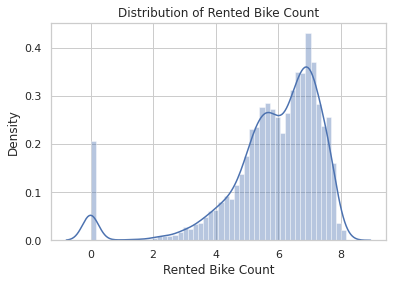

In [ ]:
sns.distplot(data['Rented Bike Count'])
plt.title('Distribution of Rented Bike Count')
plt.show()

In [ ]:
# Observing the statistical features of the features
data.describe()

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
count         8760.00000       8760.00000   8760.00000        8760.00000   
mean             5.88221         12.88292     58.22626           1.72491   
std              1.58528         11.94483     20.36241           1.03630   
min              0.00000        -17.80000      0.00000           0.00000   
25%              5.25227          3.50000     42.00000           0.90000   
50%              6.22357         13.70000     57.00000           1.50000   
75%              6.97096         22.50000     74.00000           2.30000   
max              8.17639         39.40000     98.00000           7.40000   

       Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
count        8760.00000                 8760.00000               8760.00000   
mean         1436.82580                    4.07381                  0.56911   
std           608.29871                   13.06037                  0.86875   
min            27.00000                  -30.60000                  0.00000   
25%           940.00000                   -4.70000                  0.00000   
50%          1698.00000                    5.10000                  0.01000   
75%          2000.00000                   14.80000                  0.93000   
max          2000.00000                   27.20000                  3.52000   

       Rainfall(mm)  Snowfall (cm)    weekend  
count    8760.00000     8760.00000 8760.00000  
mean        0.14869        0.07507    0.29041  
std         1.12819        0.43675    0.45398  
min         0.00000        0.00000    0.00000  
25%         0.00000        0.00000    0.00000  
50%         0.00000        0.00000    0.00000  
75%         0.00000        0.00000    1.00000  
max        35.00000        8.80000    1.00000

In the data every feature has some outliers. So we have to remove all of them.

In [ ]:
# Removing Outliers
# Creating a for loop for storing the indeces of outliers
for i in num_feat:
  indeces = []                                              # creating a empty list
  x = data[i]
  mean = data[i].mean()
  std = data[i].std()
  index = data[(np.abs(x)) - (mean) >= (3 * std)].index     # getting the index of outlier
  indeces.append(index)                                     # appending outlier indeces into indeces list


In [ ]:
# Displaying the list of indeces of outliers
list(indeces)[0]

Int64Index([ 222,  223,  224,  225,  226,  227,  228,  229,  230,  415,
            ...
            8620, 8621, 8622, 8623, 8624, 8625, 8626, 8627, 8628, 8629],
           dtype='int64', length=173)

In [ ]:
# CReating a copy of data
new_data = data.copy()

In [ ]:
# Dropping the outliers
new_data.drop(list(indeces)[0] , inplace = True)

In [ ]:
# Inspecting the data
new_data.head()

Rented Bike Count Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0            5.53733    0         -5.20000           37           2.20000   
1            5.31812    1         -5.50000           38           0.80000   
2            5.15329    2         -6.00000           39           1.00000   
3            4.67283    3         -6.20000           40           0.90000   
4            4.35671    4         -6.00000           36           2.30000   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                  -17.60000                  0.00000   
1              2000                  -17.60000                  0.00000   
2              2000                  -17.70000                  0.00000   
3              2000                  -17.60000                  0.00000   
4              2000                  -18.60000                  0.00000   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  weekend  
0       0.00000        0.00000  Winter  No Holiday             Yes        0  
1       0.00000        0.00000  Winter  No Holiday             Yes        0  
2       0.00000        0.00000  Winter  No Holiday             Yes        0  
3       0.00000        0.00000  Winter  No Holiday             Yes        0  
4       0.00000        0.00000  Winter  No Holiday             Yes        0

In [ ]:
# One hot encoding using get_dummies which converts categorical feature into numerical features
df = pd.get_dummies(data = new_data, columns = ['Hour', 'Seasons', 'Holiday', 'Functioning Day'])

In [ ]:
# Inspecting the data after one hot encoding
df.head()

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0            5.53733         -5.20000           37           2.20000   
1            5.31812         -5.50000           38           0.80000   
2            5.15329         -6.00000           39           1.00000   
3            4.67283         -6.20000           40           0.90000   
4            4.35671         -6.00000           36           2.30000   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                  -17.60000                  0.00000   
1              2000                  -17.60000                  0.00000   
2              2000                  -17.70000                  0.00000   
3              2000                  -17.60000                  0.00000   
4              2000                  -18.60000                  0.00000   

   Rainfall(mm)  Snowfall (cm)  weekend  ...  Hour_8  Hour_9  Seasons_Autumn  \
0       0.00000        0.00000        0  ...       0       0               0   
1       0.00000        0.00000        0  ...       0       0               0   
2       0.00000        0.00000        0  ...       0       0               0   
3       0.00000        0.00000        0  ...       0       0               0   
4       0.00000        0.00000        0  ...       0       0               0   

   Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_Holiday  \
0               0               0               1                0   
1               0               0               1                0   
2               0               0               1                0   
3               0               0               1                0   
4               0               0               1                0   

   Holiday_No Holiday  Functioning Day_No  Functioning Day_Yes  
0                   1                   0                    1  
1                   1                   0                    1  
2                   1                   0                    1  
3                   1                   0                    1  
4                   1                   0                    1  

[5 rows x 42 columns]

From now, the data has only numerical values.

In [ ]:
# inspecting columns of the data after one hot encoding
df.columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'weekend',
       'Hour_0', 'Hour_1', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13',
       'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19',
       'Hour_2', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23', 'Hour_3',
       'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9',
       'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_Holiday', 'Holiday_No Holiday', 'Functioning Day_No',
       'Functioning Day_Yes'],
      dtype='object')

In [ ]:
# Dropping the feature 'Dew point temperature(°C)' as it is highly correlated with Temperature feature
df.drop(['Dew point temperature(°C)'], axis = 1, inplace = True)

In [ ]:
# storing independent and dependent features
dep_var = 'Rented Bike Count'
indep_var = list(set(df.columns.tolist()) - {dep_var})
indep_var

['Hour_12',
 'Solar Radiation (MJ/m2)',
 'Hour_7',
 'Hour_4',
 'Temperature(°C)',
 'Rainfall(mm)',
 'Functioning Day_No',
 'Hour_9',
 'Hour_19',
 'Hour_2',
 'Visibility (10m)',
 'Hour_6',
 'Humidity(%)',
 'Functioning Day_Yes',
 'Hour_0',
 'Seasons_Autumn',
 'Seasons_Winter',
 'Holiday_Holiday',
 'Hour_18',
 'Hour_13',
 'Seasons_Spring',
 'Snowfall (cm)',
 'weekend',
 'Hour_16',
 'Hour_20',
 'Hour_1',
 'Hour_10',
 'Wind speed (m/s)',
 'Hour_14',
 'Hour_11',
 'Hour_15',
 'Hour_8',
 'Hour_22',
 'Hour_17',
 'Hour_21',
 'Hour_5',
 'Hour_3',
 'Seasons_Summer',
 'Holiday_No Holiday',
 'Hour_23']

In [ ]:
# Importing necessary libraries from sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
# Feature scaling using MinMaxScaler
scaler = MinMaxScaler()
df[indep_var] = scaler.fit_transform(df[indep_var])

In [ ]:
df

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0               5.53733          0.22028      0.37755           0.29730   
1               5.31812          0.21503      0.38776           0.10811   
2               5.15329          0.20629      0.39796           0.13514   
3               4.67283          0.20280      0.40816           0.12162   
4               4.35671          0.20629      0.36735           0.31081   
...                 ...              ...          ...               ...   
8755            6.91075          0.38462      0.34694           0.35135   
8756            6.63857          0.37063      0.37755           0.31081   
8757            6.54247          0.35664      0.39796           0.04054   
8758            6.56808          0.34790      0.41837           0.13514   
8759            6.36990          0.34441      0.43878           0.17568   

      Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              1.00000                  0.00000       0.00000        0.00000   
1              1.00000                  0.00000       0.00000        0.00000   
2              1.00000                  0.00000       0.00000        0.00000   
3              1.00000                  0.00000       0.00000        0.00000   
4              1.00000                  0.00000       0.00000        0.00000   
...                ...                      ...           ...            ...   
8755           0.94627                  0.00000       0.00000        0.00000   
8756           1.00000                  0.00000       0.00000        0.00000   
8757           0.98378                  0.00000       0.00000        0.00000   
8758           0.92854                  0.00000       0.00000        0.00000   
8759           0.95388                  0.00000       0.00000        0.00000   

      weekend  Hour_0  ...  Hour_8  Hour_9  Seasons_Autumn  Seasons_Spring  \
0     0.00000 1.00000  ... 0.00000 0.00000         0.00000         0.00000   
1     0.00000 0.00000  ... 0.00000 0.00000         0.00000         0.00000   
2     0.00000 0.00000  ... 0.00000 0.00000         0.00000         0.00000   
3     0.00000 0.00000  ... 0.00000 0.00000         0.00000         0.00000   
4     0.00000 0.00000  ... 0.00000 0.00000         0.00000         0.00000   
...       ...     ...  ...     ...     ...             ...             ...   
8755  0.00000 0.00000  ... 0.00000 0.00000         1.00000         0.00000   
8756  0.00000 0.00000  ... 0.00000 0.00000         1.00000         0.00000   
8757  0.00000 0.00000  ... 0.00000 0.00000         1.00000         0.00000   
8758  0.00000 0.00000  ... 0.00000 0.00000         1.00000         0.00000   
8759  0.00000 0.00000  ... 0.00000 0.00000         1.00000         0.00000   

      Seasons_Summer  Seasons_Winter  Holiday_Holiday  Holiday_No Holiday  \
0            0.00000         1.00000          0.00000             1.00000   
1            0.00000         1.00000          0.00000             1.00000   
2            0.00000         1.00000          0.00000             1.00000   
3            0.00000         1.00000          0.00000             1.00000   
4            0.00000         1.00000          0.00000             1.00000   
...              ...             ...              ...                 ...   
8755         0.00000         0.00000          0.00000             1.00000   
8756         0.00000         0.00000          0.00000             1.00000   
8757         0.00000         0.00000          0.00000             1.00000   
8758         0.00000         0.00000          0.00000             1.00000   
8759         0.00000         0.00000          0.00000             1.00000   

      Functioning Day_No  Functioning Day_Yes  
0                0.00000              1.00000  
1                0.00000              1.00000  
2                0.00000              1.00000  
3                0.00000              1.00000  
4                0.00000              1.00

In [ ]:
df.describe()

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
count         8587.00000       8587.00000   8587.00000        8587.00000   
mean             5.90099          0.54148      0.59151           0.23390   
std              1.59166          0.20764      0.20699           0.14065   
min              0.00000          0.00000      0.00000           0.00000   
25%              5.28574          0.38112      0.42857           0.12162   
50%              6.26530          0.55944      0.58163           0.20270   
75%              6.98008          0.70804      0.75510           0.31081   
max              8.17639          1.00000      1.00000           1.00000   

       Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
count        8587.00000               8587.00000    8587.00000     8587.00000   
mean            0.71880                  0.16372       0.00425        0.01587   
std             0.30588                  0.24842       0.03239        0.09671   
min             0.00000                  0.00000       0.00000        0.00000   
25%             0.47111                  0.00000       0.00000        0.00000   
50%             0.85099                  0.00284       0.00000        0.00000   
75%             1.00000                  0.26989       0.00000        0.00000   
max             1.00000                  1.00000       1.00000        1.00000   

         weekend     Hour_0  ...     Hour_8     Hour_9  Seasons_Autumn  \
count 8587.00000 8587.00000  ... 8587.00000 8587.00000      8587.00000   
mean     0.29277    0.04181  ...    0.04134    0.04134         0.25084   
std      0.45506    0.20016  ...    0.19909    0.19909         0.43352   
min      0.00000    0.00000  ...    0.00000    0.00000         0.00000   
25%      0.00000    0.00000  ...    0.00000    0.00000         0.00000   
50%      0.00000    0.00000  ...    0.00000    0.00000         0.00000   
75%      1.00000    0.00000  ...    0.00000    0.00000         1.00000   
max      1.00000    1.00000  ...    1.00000    1.00000         1.00000   

       Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_Holiday  \
count      8587.00000      8587.00000      8587.00000       8587.00000   
mean          0.25713         0.25713         0.23489          0.05031   
std           0.43708         0.43708         0.42395          0.21859   
min           0.00000         0.00000         0.00000          0.00000   
25%           0.00000         0.00000         0.00000          0.00000   
50%           0.00000         0.00000         0.00000          0.00000   
75%           1.00000         1.00000         0.00000          0.00000   
max           1.00000         1.00000         1.00000          1.00000   

       Holiday_No Holiday  Functioning Day_No  Functioning Day_Yes  
count          8587.00000          8587.00000           8587.00000  
mean              0.94969             0.03435              0.96565  
std               0.21859             0.18215              0.18215  
min               0.00000             0.00000              0.00000  
25%               1.00000             0.00000              1.00000  
50%               1.00000             0.00000              1.00000  
75%               1.00000             0.00000              1.00000  
max               1.00000             1.00000              1.00000  

[8 rows x 41 columns]

In [ ]:
df

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0               5.53733          0.22028      0.37755           0.29730   
1               5.31812          0.21503      0.38776           0.10811   
2               5.15329          0.20629      0.39796           0.13514   
3               4.67283          0.20280      0.40816           0.12162   
4               4.35671          0.20629      0.36735           0.31081   
...                 ...              ...          ...               ...   
8755            6.91075          0.38462      0.34694           0.35135   
8756            6.63857          0.37063      0.37755           0.31081   
8757            6.54247          0.35664      0.39796           0.04054   
8758            6.56808          0.34790      0.41837           0.13514   
8759            6.36990          0.34441      0.43878           0.17568   

      Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              1.00000                  0.00000       0.00000        0.00000   
1              1.00000                  0.00000       0.00000        0.00000   
2              1.00000                  0.00000       0.00000        0.00000   
3              1.00000                  0.00000       0.00000        0.00000   
4              1.00000                  0.00000       0.00000        0.00000   
...                ...                      ...           ...            ...   
8755           0.94627                  0.00000       0.00000        0.00000   
8756           1.00000                  0.00000       0.00000        0.00000   
8757           0.98378                  0.00000       0.00000        0.00000   
8758           0.92854                  0.00000       0.00000        0.00000   
8759           0.95388                  0.00000       0.00000        0.00000   

      weekend  Hour_0  ...  Hour_8  Hour_9  Seasons_Autumn  Seasons_Spring  \
0     0.00000 1.00000  ... 0.00000 0.00000         0.00000         0.00000   
1     0.00000 0.00000  ... 0.00000 0.00000         0.00000         0.00000   
2     0.00000 0.00000  ... 0.00000 0.00000         0.00000         0.00000   
3     0.00000 0.00000  ... 0.00000 0.00000         0.00000         0.00000   
4     0.00000 0.00000  ... 0.00000 0.00000         0.00000         0.00000   
...       ...     ...  ...     ...     ...             ...             ...   
8755  0.00000 0.00000  ... 0.00000 0.00000         1.00000         0.00000   
8756  0.00000 0.00000  ... 0.00000 0.00000         1.00000         0.00000   
8757  0.00000 0.00000  ... 0.00000 0.00000         1.00000         0.00000   
8758  0.00000 0.00000  ... 0.00000 0.00000         1.00000         0.00000   
8759  0.00000 0.00000  ... 0.00000 0.00000         1.00000         0.00000   

      Seasons_Summer  Seasons_Winter  Holiday_Holiday  Holiday_No Holiday  \
0            0.00000         1.00000          0.00000             1.00000   
1            0.00000         1.00000          0.00000             1.00000   
2            0.00000         1.00000          0.00000             1.00000   
3            0.00000         1.00000          0.00000             1.00000   
4            0.00000         1.00000          0.00000             1.00000   
...              ...             ...              ...                 ...   
8755         0.00000         0.00000          0.00000             1.00000   
8756         0.00000         0.00000          0.00000             1.00000   
8757         0.00000         0.00000          0.00000             1.00000   
8758         0.00000         0.00000          0.00000             1.00000   
8759         0.00000         0.00000          0.00000             1.00000   

      Functioning Day_No  Functioning Day_Yes  
0                0.00000              1.00000  
1                0.00000              1.00000  
2                0.00000              1.00000  
3                0.00000              1.00000  
4                0.00000              1.00

In [ ]:
# Storing data of independent features and dependent feature into X and y respectively 
X = df[indep_var]
y = df[dep_var]

In [ ]:
import statsmodels.api as sm

# create feature matrix and target variable

X = sm.add_constant(X) # add constant value for the intercept term


# define and fit model
lineare_regression_model = sm.OLS(y, X)
result = lineare_regression_model.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     1245.
Date:                Mon, 21 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:34:23   Log-Likelihood:                -8312.6
No. Observations:                8587   AIC:                         1.670e+04
Df Residuals:                    8550   BIC:                         1.696e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

From the above result, we can see the features with p value greater than 0.05 are not significant

In [ ]:
# Feature selection method by mutual info regression
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X, y)
mutual_info

array([1.10076355e-04, 1.33042962e-02, 1.93027455e-01, 1.63214642e-03,
       4.64581580e-02, 3.70479384e-01, 6.77605247e-02, 1.45933967e-01,
       1.40067411e-02, 1.86589108e-02, 1.95535527e-02, 6.06273646e-02,
       1.91233104e-02, 1.06889418e-01, 1.57146924e-01, 9.60859331e-03,
       6.32518869e-02, 1.93418311e-01, 1.10774444e-02, 3.16758358e-02,
       8.62870330e-03, 1.06986474e-02, 2.87279837e-02, 1.11062340e-02,
       7.34877837e-03, 7.29997438e-03, 8.96304038e-03, 1.43669576e-02,
       1.13553805e-02, 9.36668684e-03, 1.58706962e-02, 3.78478081e-03,
       1.95474941e-02, 1.60454494e-02, 1.42430540e-02, 9.43760289e-03,
       4.01453746e-02, 2.94857601e-02, 6.36618164e-02, 7.55530354e-03,
       1.08479406e-02])

In [ ]:
# Creating a dataframe with features and thier dependence on dependent feature
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
info_df = mutual_info.sort_values(ascending = False).reset_index().rename(columns = {'index':'feature', 0:'info'})
info_df

feature    info
0           Temperature(°C) 0.37048
1            Seasons_Winter 0.19342
2   Solar Radiation (MJ/m2) 0.19303
3       Functioning Day_Yes 0.15715
4        Functioning Day_No 0.14593
5               Humidity(%) 0.10689
6              Rainfall(mm) 0.06776
7            Seasons_Summer 0.06366
8            Seasons_Autumn 0.06325
9          Visibility (10m) 0.06063
10                   Hour_4 0.04646
11                   Hour_5 0.04015
12                  Hour_18 0.03168
13                   Hour_3 0.02949
14            Snowfall (cm) 0.02873
15                   Hour_2 0.01955
16                   Hour_8 0.01955
17                   Hour_6 0.01912
18                  Hour_19 0.01866
19                  Hour_22 0.01605
20                  Hour_11 0.01587
21                  Hour_10 0.01437
22                  Hour_17 0.01424
23                   Hour_9 0.01401
24                  Hour_12 0.01330
25         Wind speed (m/s) 0.01136
26                  weekend 0.01111
27          Holiday_Holiday 0.01108
28                  Hour_23 0.01085
29           Seasons_Spring 0.01070
30                   Hour_0 0.00961
31                  Hour_21 0.00944
32                  Hour_14 0.00937
33                   Hour_1 0.00896
34                  Hour_13 0.00863
35       Holiday_No Holiday 0.00756
36                  Hour_16 0.00735
37                  Hour_20 0.00730
38                  Hour_15 0.00378
39                   Hour_7 0.00163
40                    const 0.00011

In [ ]:
# Feature selection 
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
feature_selection = SelectFromModel(Lasso(alpha = 0.005, random_state = 0))
feature_selection.fit(X, y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [ ]:
# Displaying the features with more importance
sel = X.columns[feature_selection.get_support()]
sel

Index(['Hour_7', 'Hour_4', 'Temperature(°C)', 'Rainfall(mm)',
       'Functioning Day_No', 'Hour_9', 'Hour_19', 'Hour_2', 'Visibility (10m)',
       'Hour_6', 'Humidity(%)', 'Seasons_Autumn', 'Seasons_Winter',
       'Holiday_Holiday', 'Hour_18', 'Seasons_Spring', 'weekend', 'Hour_20',
       'Hour_10', 'Hour_11', 'Hour_8', 'Hour_22', 'Hour_17', 'Hour_21',
       'Hour_5', 'Hour_3', 'Seasons_Summer', 'Hour_23'],
      dtype='object')

In [ ]:
x_1 = df[sel]
y_1 = df['Rented Bike Count']

In [ ]:
# Function which prints the summary 
def summ(df):
  
  X = df[list(sel)]
  y = df['Rented Bike Count']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  X = sm.add_constant(X_train) # add constant value for the intercept term


  # define and fit model
  lineare_regression_model = sm.OLS(y_train, X)
  result = lineare_regression_model.fit()
  print(result.summary())


array([5.53733427, 5.31811999, 5.15329159, ..., 6.54247196, 6.56807791,
       6.36990098])

In [ ]:
# Summary with only selected features
summ(df)

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     1325.
Date:                Mon, 21 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:36:03   Log-Likelihood:                -6692.3
No. Observations:                6869   AIC:                         1.344e+04
Df Residuals:                    6841   BIC:                         1.363e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.7106      0

In [ ]:
# Splitting the data into train and test datsets
from sklearn.model_selection import train_test_split
x = X[sel]
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.25, random_state = 44)


In [ ]:
X_train.shape

(6440, 41)

In [ ]:
y_train.shape

(6440,)

In [ ]:
X_test.shape

(2147, 41)

In [ ]:
y_test.shape

(2147,)

In [ ]:
# Creating a function which results evaluation metrics of the model.

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

def metrics(model):
  # metrics for training dataset
  r2_tr = r2_score(y_train, model.predict(X_train))
  mse_tr = mean_squared_error(y_train, model.predict(X_train))
  rmse_tr = np.sqrt(mse_tr)
  
  n_tr = len(X_train)
  k_tr = (X_train.shape[1])
  adj_r2_tr = 1 - ( ((n_tr-1)/(n_tr-k_tr-1)) * (1 - r2_tr) )

  mean_abs_err_tr = sum(abs(y_train - model.predict(X_train))) /len(y_train)

  dat_dict_tr = {'r2_score': r2_tr,
              'Mean Square Error':mse_tr,
              'Root mean square error':rmse_tr,
              'Adjusted r2':adj_r2_tr,
              'Mean absolute error': mean_abs_err_tr 
              }
  data_df_tr = pd.Series(dat_dict_tr).reset_index().rename(columns = {'index': 'Metric', 0:'value'})
  

  print('The evaluation metrics for training dataset.....')
  display(data_df_tr)


  print('\t')
  print('\t')

  # metrics for test dataset
  r2_te = r2_score(y_test, model.predict(X_test))
  mse_te = mean_squared_error(y_test, model.predict(X_test))
  rmse_te = np.sqrt(mse_te)
  
  n_te = len(X_test)
  k_te = (X_test.shape[1])
  adj_r2_te = 1 - ( ((n_te-1)/(n_te-k_te-1)) * (1 - r2_te) )

  mean_abs_err_te = sum(abs(y_test - model.predict(X_test))) /len(y_test)


  dat_dict_te = {'r2_score': r2_te,
              'Mean Square Error':mse_te,
              'Root mean square error':rmse_te,
              'Adjusted r2':adj_r2_te,
              'Mean absolute error': mean_abs_err_te 
              }
  data_df_te = pd.Series(dat_dict_te).reset_index().rename(columns = {'index': 'Metric', 0:'value'})
  
  print('The evaluation metrics for test dataset.....')
  display(data_df_te)
  print('\t')



In [ ]:
# Creating a function which plots actual and predicted values for the model 
def actual_pred(model):
  plt.figure(figsize = (20,12))
  plt.plot(np.array(y_test), color ='red')
  plt.plot(np.array(model.predict(X_test)), color = 'green')
  plt.legend(["Predicted","Actual"])
  plt.show()

In [ ]:
# Creating a function which plots actual and predicted values for the model 
def actual_pred_few(model):

  plt.figure(figsize = (20,12))
  plt.plot(np.array(y_test[100:200]), color ='red')
  plt.plot(np.array(model.predict(X_test[100:200])), color = 'green')
  plt.legend(["Predicted","Actual"])
  plt.show()

const  Hour_12  Solar Radiation (MJ/m2)  Hour_7  Hour_4  \
8131 1.00000  0.00000                  0.00000 0.00000 0.00000   
5677 1.00000  0.00000                  0.49432 0.00000 0.00000   
7908 1.00000  1.00000                  0.05398 0.00000 0.00000   
346  1.00000  0.00000                  0.09659 0.00000 0.00000   
5577 1.00000  0.00000                  0.48580 0.00000 0.00000   
...      ...      ...                      ...     ...     ...   
5272 1.00000  0.00000                  0.61364 0.00000 0.00000   
7483 1.00000  0.00000                  0.00000 0.00000 0.00000   
5833 1.00000  0.00000                  0.00000 0.00000 0.00000   
4655 1.00000  0.00000                  0.00000 0.00000 0.00000   
4867 1.00000  0.00000                  0.17614 0.00000 0.00000   

      Temperature(°C)  Rainfall(mm)  Functioning Day_No  Hour_9  Hour_19  ...  \
8131          0.53671       0.00000             0.00000 0.00000  1.00000  ...   
5677          0.87587       0.00000             0.00000 0.00000  0.00000  ...   
7908          0.52797       0.02857             0.00000 0.00000  0.00000  ...   
346           0.23077       0.00000             0.00000 0.00000  0.00000  ...   
5577          0.82867       0.00000             0.00000 1.00000  0.00000  ...   
...               ...           ...                 ...     ...      ...  ...   
5272          0.79895       0.00000             0.00000 0.00000  0.00000  ...   
7483          0.59790       0.00000             0.00000 0.00000  1.00000  ...   
5833          0.83392       0.00000             0.00000 0.00000  0.00000  ...   
4655          0.65210       0.00000             0.00000 0.00000  0.00000  ...   
4867          0.78147       0.00000             0.00000 0.00000  1.00000  ...   

      Hour_15  Hour_8  Hour_22  Hour_17  Hour_21  Hour_5  Hour_3  \
8131  0.00000 0.00000  0.00000  0.00000  0.00000 0.00000 0.00000   
5677  0.00000 0.00000  0.00000  0.00000  0.00000 0.00000 0.00000   
7908  0.00000 0.00000  0.00000  0.00000  0.00000 0.00000 0.00000   
346   0.00000 0.00000  0.00000  0.00000  0.00000 0.00000 0.00000   
5577  0.00000 0.00000  0.00000  0.00000  0.00000 0.00000 0.00000   
...       ...     ...      ...      ...      ...     ...     ...   
5272  0.00000 0.00000  0.00000  0.00000  0.00000 0.00000 0.00000   
7483  0.00000 0.00000  0.00000  0.00000  0.00000 0.00000 0.00000   
5833  0.00000 0.00000  0.00000  0.00000  0.00000 0.00000 0.00000   
4655  0.00000 0.00000  0.00000  0.00000  0.00000 0.00000 0.00000   
4867  0.00000 0.00000  0.00000  0.00000  0.00000 0.00000 0.00000   

      Seasons_Summer  Holiday_No Holiday  Hour_23  
8131         0.00000             1.00000  0.00000  
5677         1.00000             1.00000  0.00000  
7908         0.00000             1.00000  0.00000  
346          0.00000             1.00000  0.00000  
5577         1.00000             1.00000  0.00000  
...              ...                 ...      ...  
5272         1.00000             1.00000  0.00000  
7483         0.00000             1.00000  0.00000  
5833         1.00000             1.00000  0.00000  
4655         1.00000             1.00000  1.00000  
4867         1.00000             1.00000  0.00000  

[107 rows x 41 columns]

# **Fitting into Model**

In [ ]:
X_train.shape[1]

41

# **Linear regression**

In [ ]:
# Fitting the data into linear regression model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_model = lin_reg.fit(X_train, y_train) 


In [ ]:
# Evluation metrics for linear regression
metrics(lin_model)

The evaluation metrics for training dataset.....


Metric   value
0                r2_score 0.84022
1       Mean Square Error 0.39996
2  Root mean square error 0.63242
3             Adjusted r2 0.83919
4     Mean absolute error 0.43906

	
	
The evaluation metrics for test dataset.....


Metric   value
0                r2_score 0.83619
1       Mean Square Error 0.42967
2  Root mean square error 0.65549
3             Adjusted r2 0.83300
4     Mean absolute error 0.44334

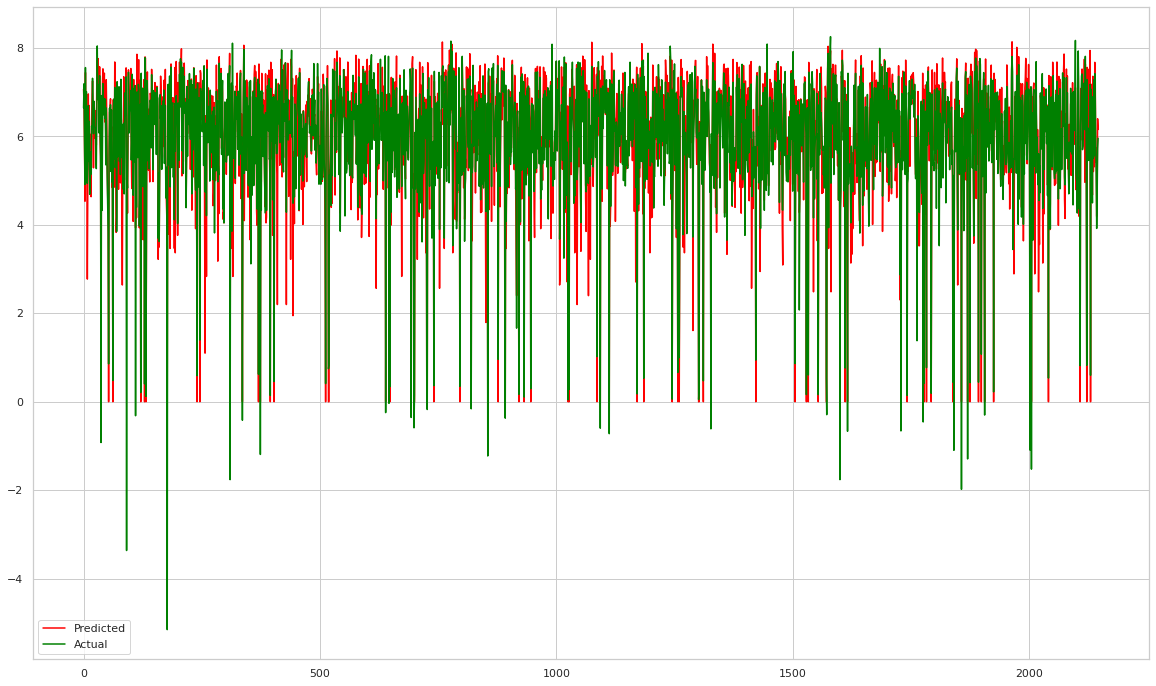

In [ ]:
actual_pred(lin_model)

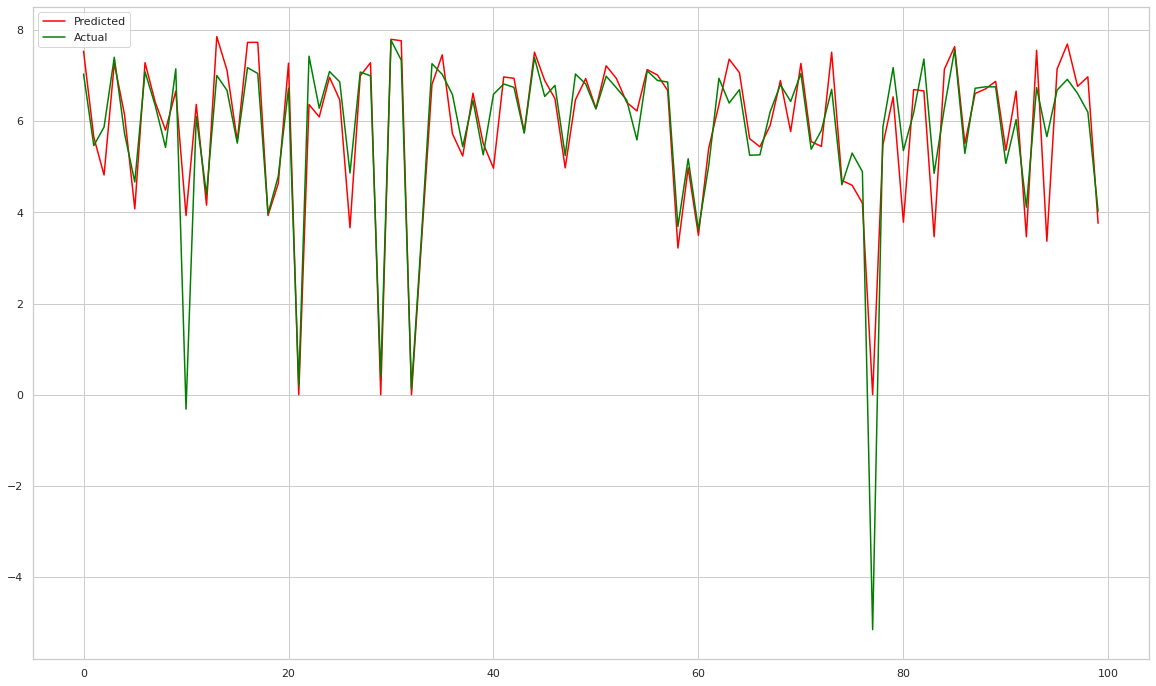

In [ ]:
actual_pred_few(lin_model)

By fiiting the data into linear regression model, we get the 


*   score of training dataset :  0.842243
*   score of testing dataset : 0.823161



# **Lasso Regression**

In [ ]:
# Implementing lasso regression with hyperparameter tuning
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
lasso_reg = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_reg = lasso_reg.fit(X_train,y_train)

In [ ]:
# Getting best parameters after hyperparameter tuning
lasso_reg.best_params_

{'alpha': 0.0001}

In [ ]:
# Getting best score after hyperparameter tuning
lasso_reg.best_score_

-0.41301662700312874

In [ ]:
# Metrics for lasso regression
metrics(lasso_reg)

The evaluation metrics for training dataset.....


Metric   value
0                r2_score 0.84022
1       Mean Square Error 0.39994
2  Root mean square error 0.63241
3             Adjusted r2 0.83920
4     Mean absolute error 0.43911

	
	
The evaluation metrics for test dataset.....


Metric   value
0                r2_score 0.83654
1       Mean Square Error 0.42875
2  Root mean square error 0.65479
3             Adjusted r2 0.83335
4     Mean absolute error 0.44342

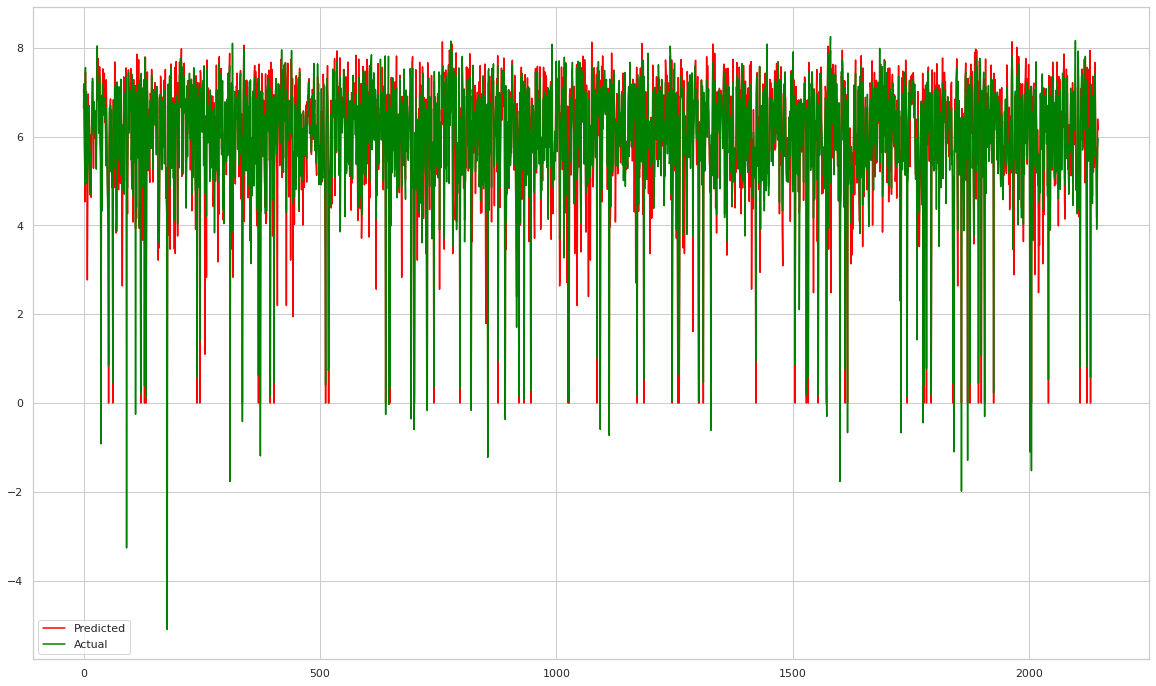

In [ ]:
# Plotting actual and predicted values
actual_pred(lasso_reg)

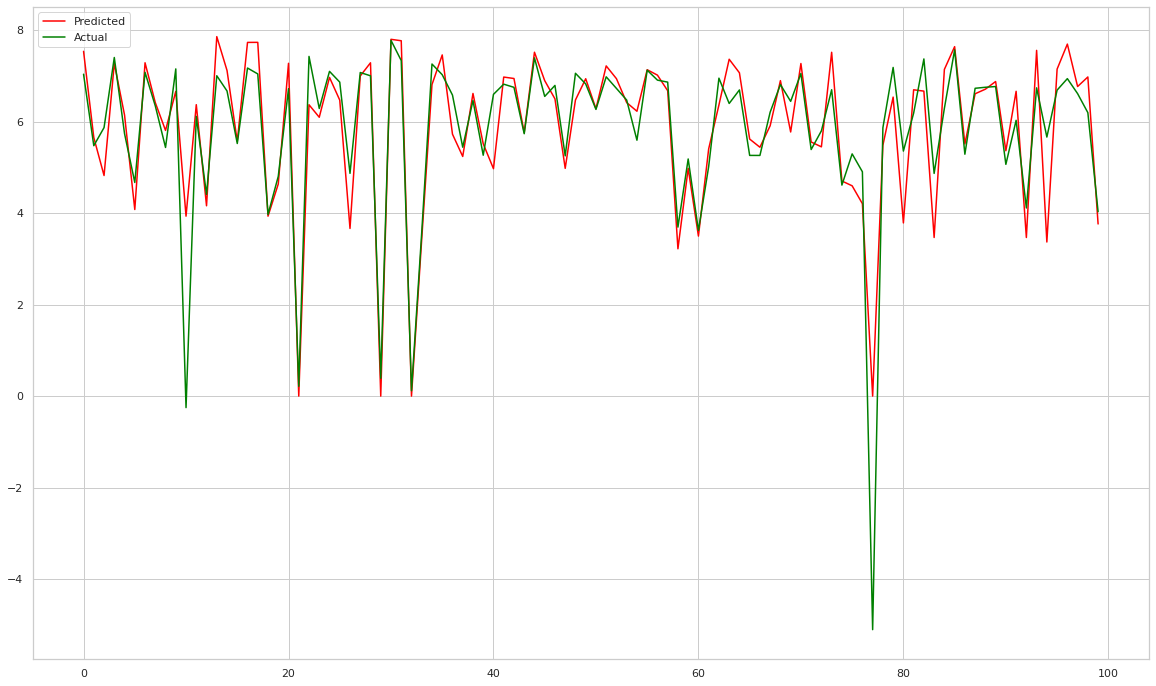

In [ ]:
actual_pred_few(lasso_reg)

By fiiting the data into lasso regression model, we get the 


*   score of training dataset :  0.842213
*   score of testing dataset : 0.823325



**Ridge Regression**

In [ ]:
# Implementing Ridge regression with hyperparameter tuning
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_reg = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_reg = ridge_reg.fit(X_train,y_train)
ridge_reg

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
# Getting best parameters after hyperparameter tuning
ridge_reg.best_params_

{'alpha': 0.01}

In [ ]:
# Getting best score after hyperparameter tuning
ridge_reg.best_score_


-0.4131447795718768

In [ ]:
# Metrics for Ridge regression model
metrics(ridge_reg)

The evaluation metrics for training dataset.....


Metric   value
0                r2_score 0.84023
1       Mean Square Error 0.39992
2  Root mean square error 0.63239
3             Adjusted r2 0.83921
4     Mean absolute error 0.43878

	
	
The evaluation metrics for test dataset.....


Metric   value
0                r2_score 0.83618
1       Mean Square Error 0.42968
2  Root mean square error 0.65550
3             Adjusted r2 0.83299
4     Mean absolute error 0.44329

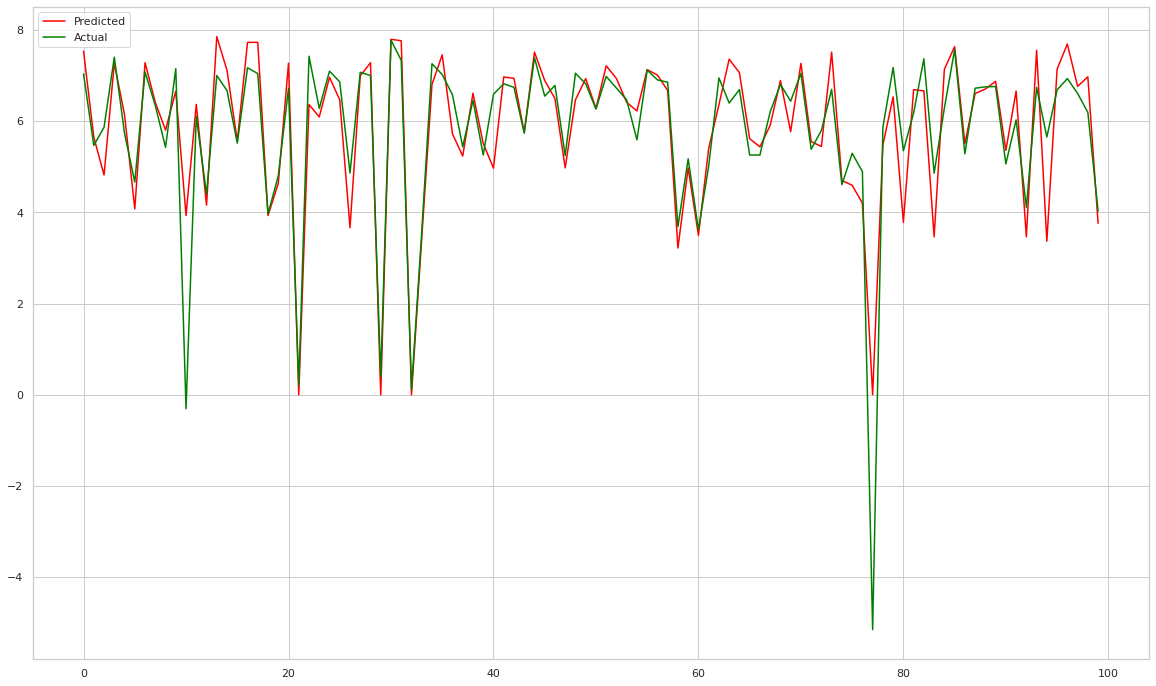

In [ ]:
actual_pred_few(ridge_reg)

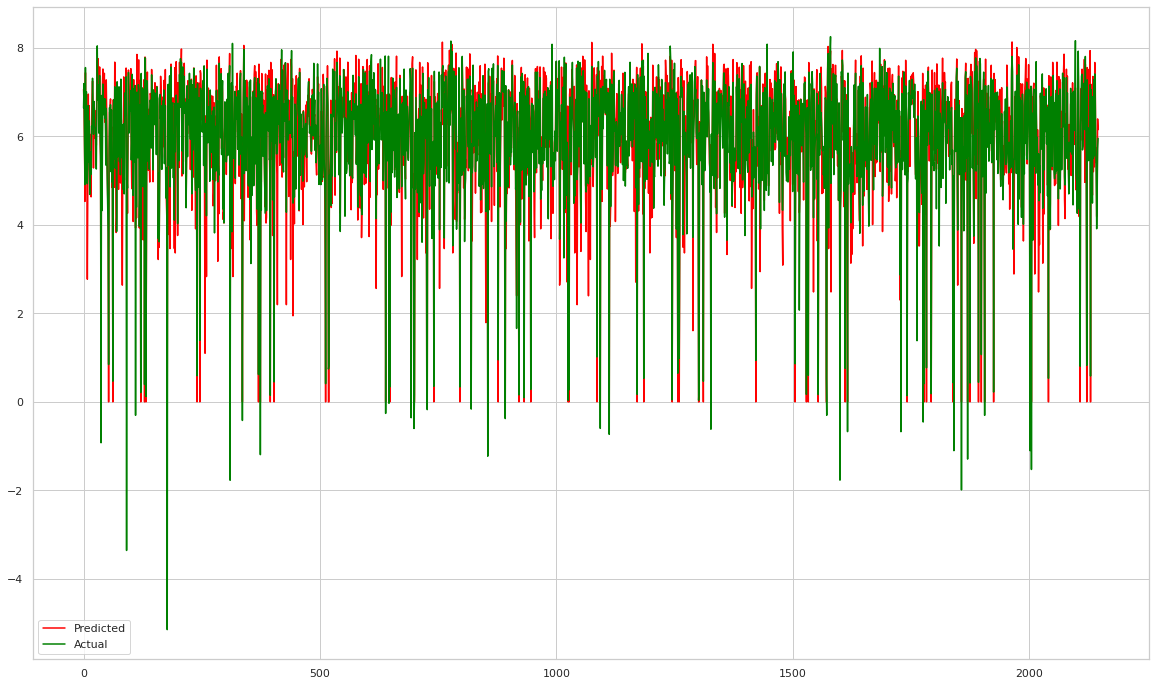

In [ ]:
# Plotting actual and predicted values for Ridge regression model
actual_pred(ridge_reg)

By fiiting the data into Ridge regression model, we get the 


*   score of training dataset :  0.842220
*   score of testing dataset : 0.823099



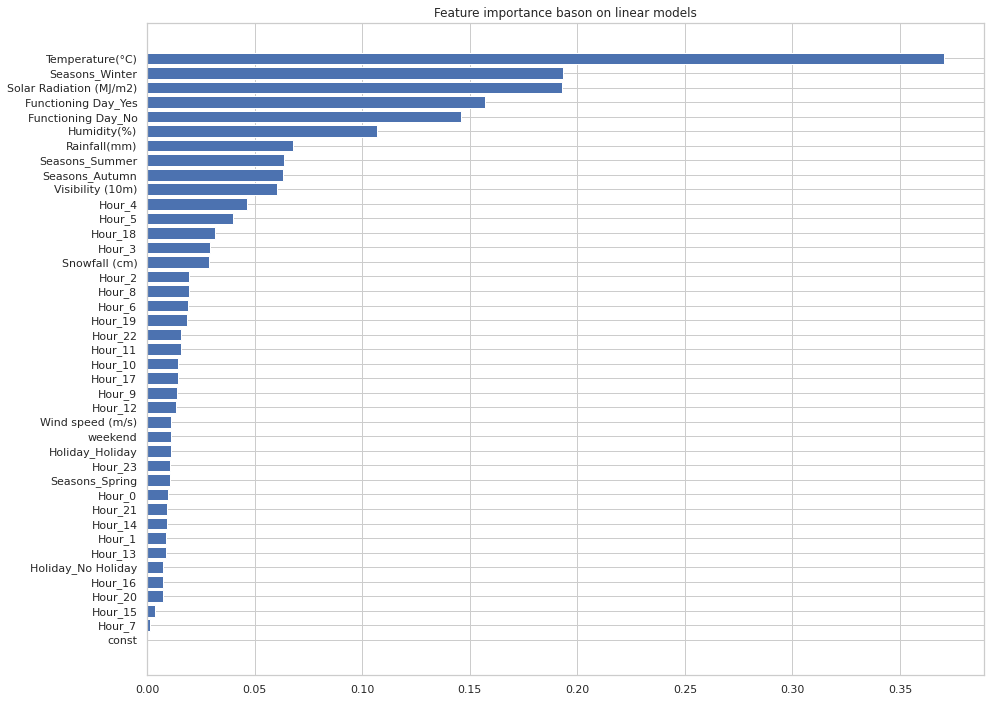

In [ ]:
# Plotting feature importance for above linear regression models
plt.figure(figsize = (15, 12))
feat_imp_lr = pd.DataFrame({'feature':info_df['feature'], 'importance':info_df['info']}).sort_values(by = 'importance' , ascending = True)
plt.barh(feat_imp_lr['feature'], feat_imp_lr['importance'])
plt.title('Feature importance bason on linear models')
plt.show()

**Decision Tree Regressor**





In [ ]:
#Fitting the data into decision tree regressor model
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
des_tree_reg = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
des_tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
# Evaluation metrics for training and testing datasets 
metrics(des_tree_reg)

The evaluation metrics for training dataset.....


Metric   value
0                r2_score 1.00000
1       Mean Square Error 0.00000
2  Root mean square error 0.00000
3             Adjusted r2 1.00000
4     Mean absolute error 0.00000

	
	
The evaluation metrics for test dataset.....


Metric   value
0                r2_score 0.87567
1       Mean Square Error 0.32611
2  Root mean square error 0.57106
3             Adjusted r2 0.87325
4     Mean absolute error 0.34911

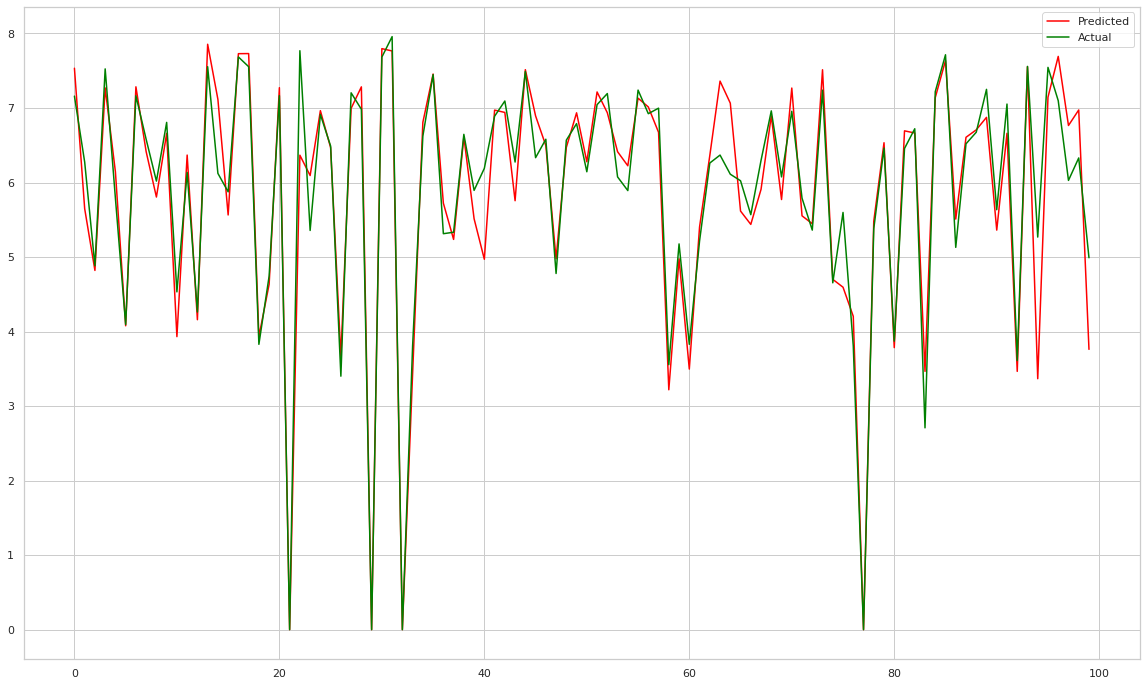

In [ ]:
actual_pred_few(des_tree_reg)

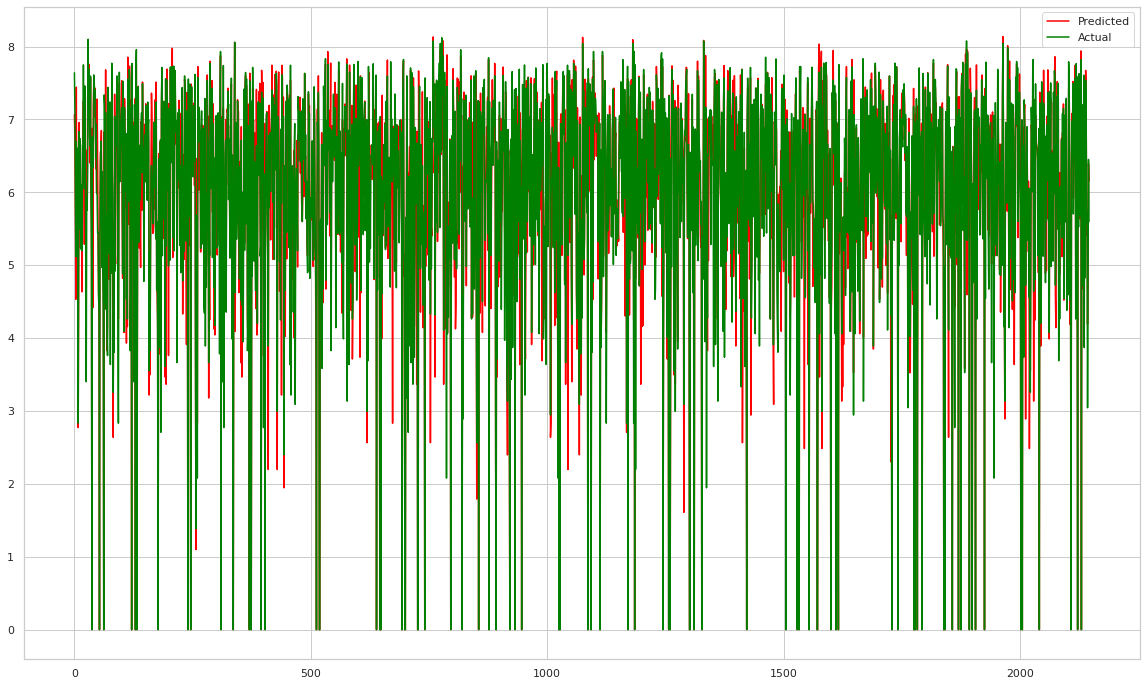

In [ ]:
# Plotting the actual and predicted values of the model
actual_pred(des_tree_reg)

By fiiting the data into Desicion Tree regressor model, we get the 


*   score of training dataset :  0.999999
*   score of testing dataset : 0.845072


 We can say the model is overfitted. So lets do hyperparameter tuning.






In [ ]:
# Hyper parameter tuning for the desicion tree regressor model
parameters = {"splitter":["best","random"],
            "max_depth" : [1,3,5,7,8],
           "min_samples_leaf":[1,2,3,4]
           }
des_tree_reg_hpt = GridSearchCV(des_tree_reg, parameters, scoring='neg_mean_squared_error', cv=3)
des_tree_reg_hpt.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [1, 3, 5, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [ ]:
# Getting best parameters
des_tree_reg_hpt.best_params_

{'max_depth': 8, 'min_samples_leaf': 4, 'splitter': 'best'}

In [ ]:
# Getting best score
des_tree_reg_hpt.best_score_

-0.3914081065559822

In [ ]:
# Evaluation metrics for training and testing dataset
metrics(des_tree_reg_hpt)

The evaluation metrics for training dataset.....


Metric   value
0                r2_score 0.88137
1       Mean Square Error 0.29694
2  Root mean square error 0.54492
3             Adjusted r2 0.88061
4     Mean absolute error 0.39633

	
	
The evaluation metrics for test dataset.....


Metric   value
0                r2_score 0.87068
1       Mean Square Error 0.33920
2  Root mean square error 0.58241
3             Adjusted r2 0.86816
4     Mean absolute error 0.42027

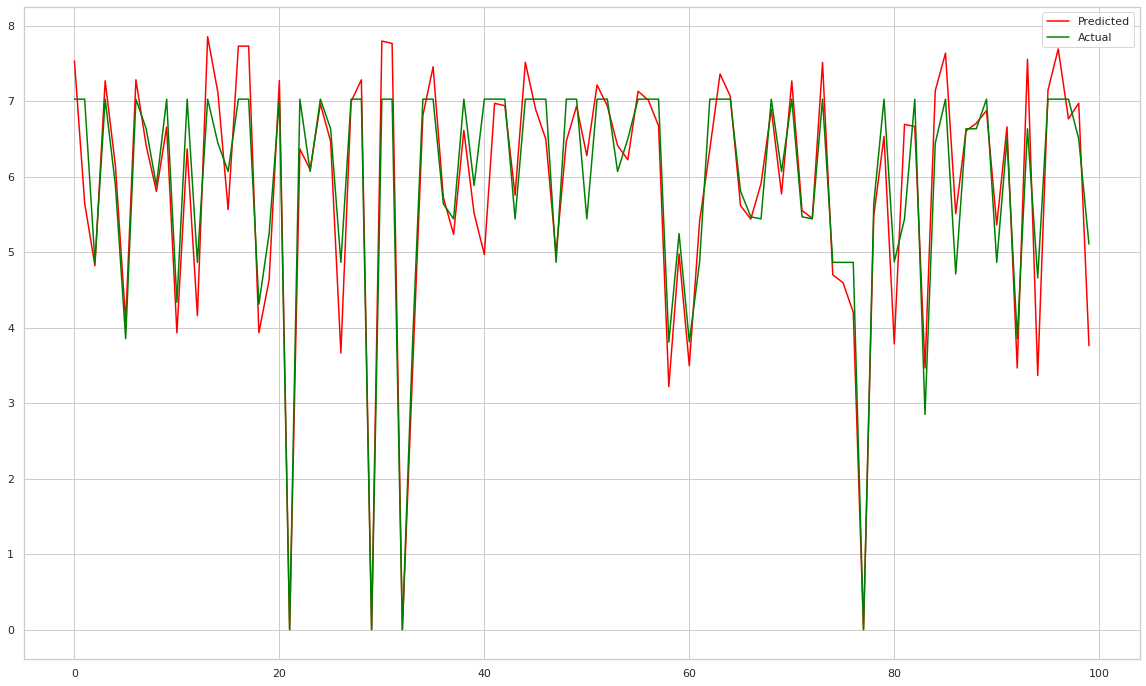

In [ ]:
actual_pred_few(des_tree_reg_hpt)

After applying hyperparameter tuning, we get the 


*  score of training dataset : 0.856556
*  score of testing dataset : 0.842094



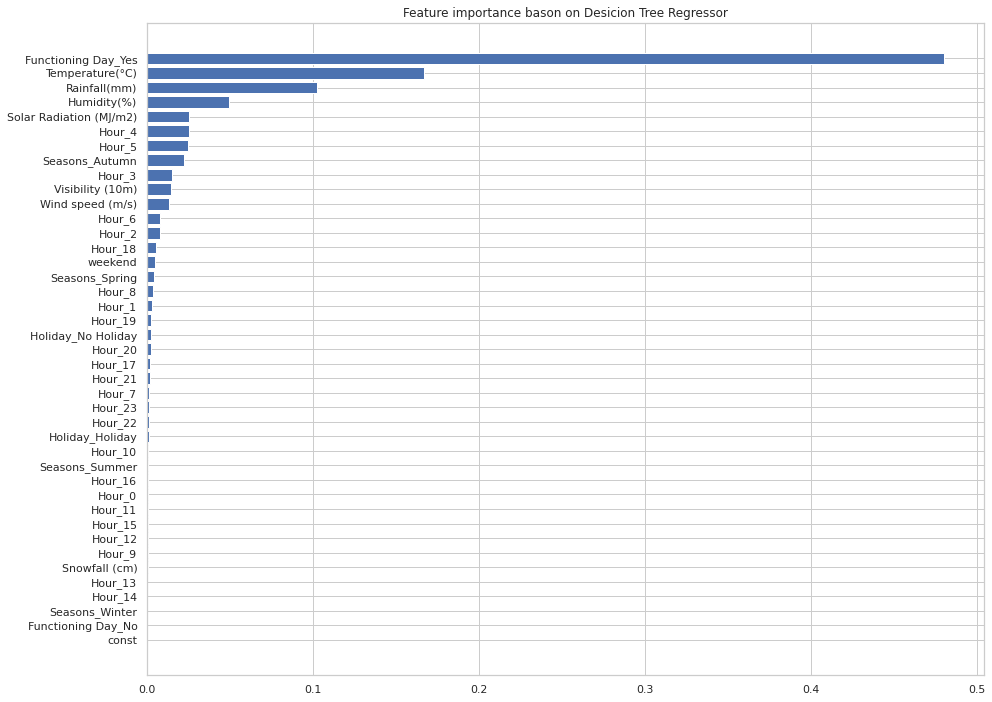

In [ ]:
# Plotting feature importance for Desicion Tree Regressor
plt.figure(figsize = (15, 12))
feat_imp_ds = pd.DataFrame({'feature':X_train.columns, 'importance':des_tree_reg.feature_importances_}).sort_values(by = 'importance' , ascending = True)
plt.barh(feat_imp_ds['feature'], feat_imp_ds['importance'])
plt.title('Feature importance bason on Desicion Tree Regressor')
plt.show()

**Random Forest Regression**

In [ ]:
# Fitting the data into Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Evaluation metrics of training and testing datasets
metrics(rf_reg)

The evaluation metrics for training dataset.....


Metric   value
0                r2_score 0.98975
1       Mean Square Error 0.02565
2  Root mean square error 0.16015
3             Adjusted r2 0.98969
4     Mean absolute error 0.09826

	
	
The evaluation metrics for test dataset.....


Metric   value
0                r2_score 0.93594
1       Mean Square Error 0.16802
2  Root mean square error 0.40990
3             Adjusted r2 0.93469
4     Mean absolute error 0.25234

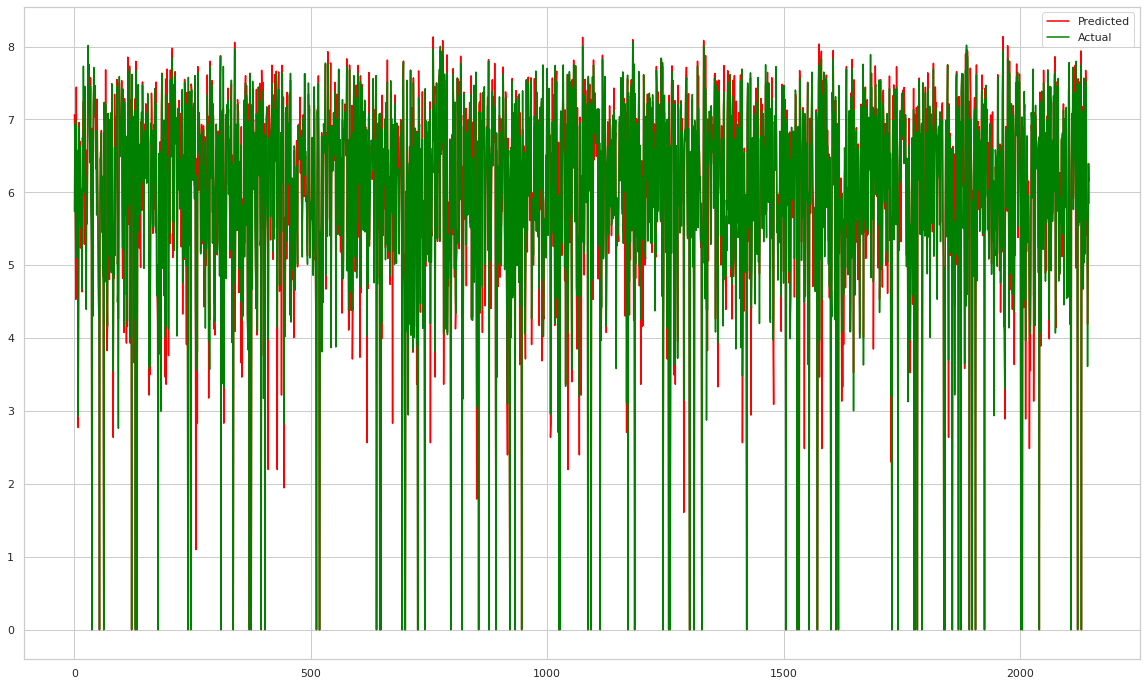

In [ ]:
# Plotting the actual and predicted values of the model
actual_pred(rf_reg)

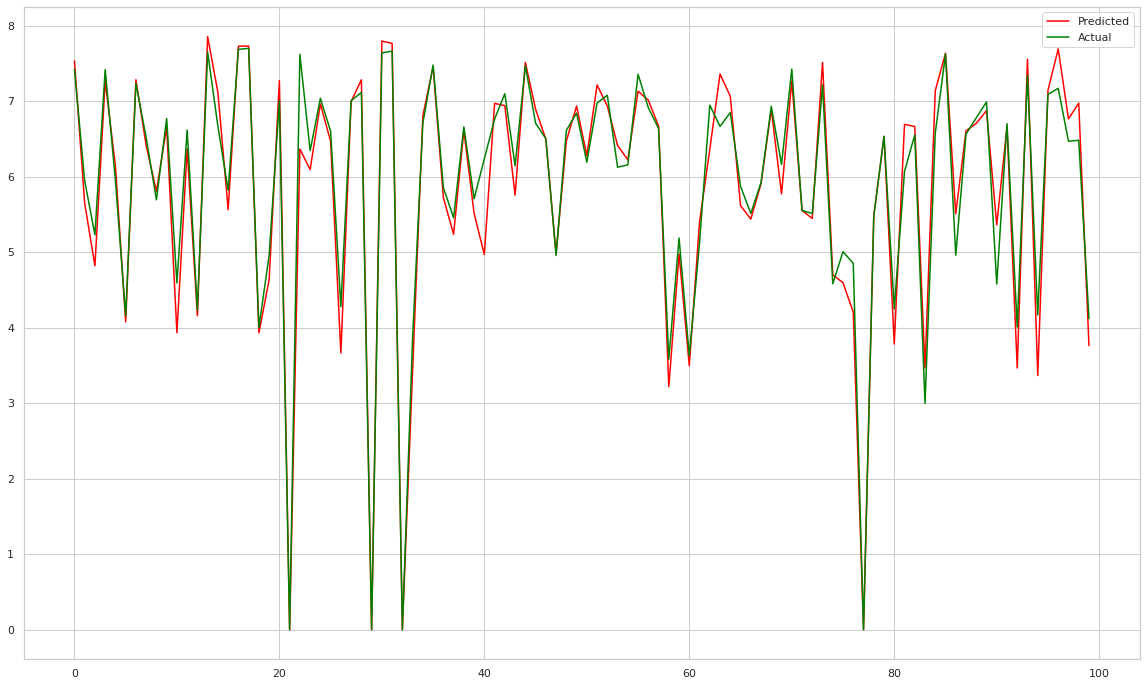

In [ ]:
actual_pred_few(rf_reg)

By fiiting the data into Random Forest regressor model, we get the 


*   score of training dataset :  0.988931
*   score of testing dataset : 0.931273

Which is somewhat overfitting. So lets reduce overfitting using hyperparameter tuning.












In [ ]:
# Hyper parameter tuning for Random forest regressor model
parameters = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'min_samples_leaf': [3, 4, 5],
    'n_estimators': [100, 200, 300]
}
rf_reg_hpt = GridSearchCV(rf_reg, parameters, scoring='neg_mean_squared_error', cv=3)
rf_reg_hpt.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100],
                         'min_samples_leaf': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [ ]:
# Best parameters
rf_reg_hpt.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'min_samples_leaf': 3,
 'n_estimators': 300}

In [ ]:
# Best score
rf_reg_hpt.best_score_

-0.21242178920138644

In [ ]:
# EValuation metrics 
metrics(rf_reg_hpt)

The evaluation metrics for training dataset.....


Metric   value
0                r2_score 0.97340
1       Mean Square Error 0.06658
2  Root mean square error 0.25804
3             Adjusted r2 0.97323
4     Mean absolute error 0.15399

	
	
The evaluation metrics for test dataset.....


Metric   value
0                r2_score 0.93637
1       Mean Square Error 0.16689
2  Root mean square error 0.40852
3             Adjusted r2 0.93514
4     Mean absolute error 0.25372

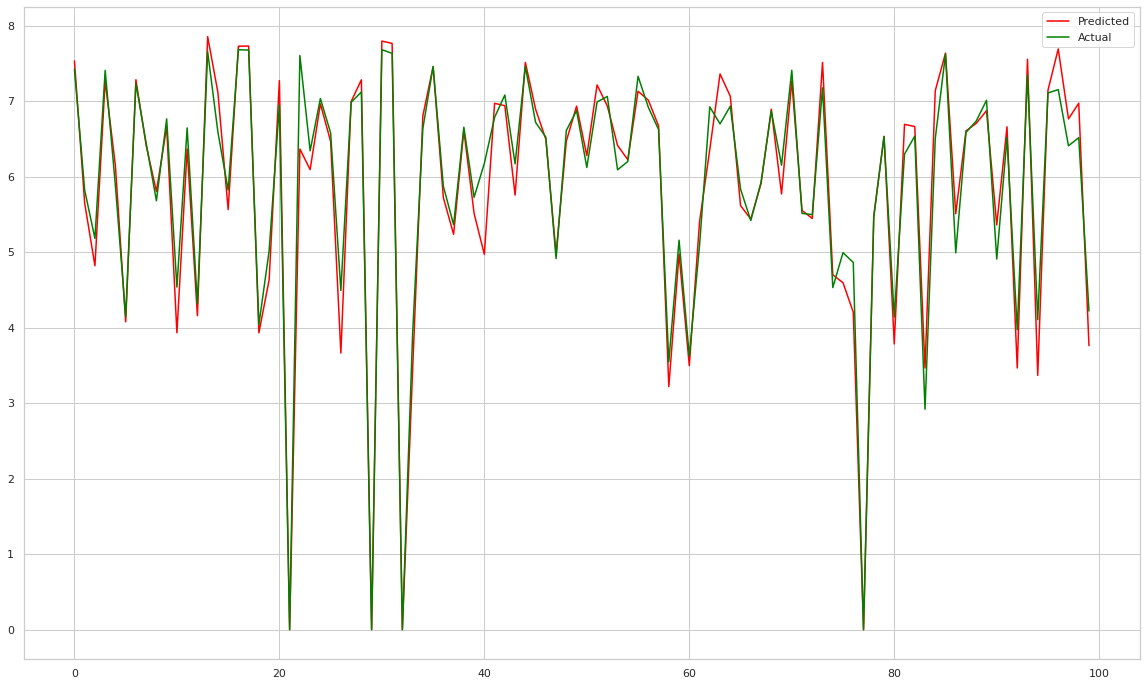

In [ ]:
actual_pred_few(rf_reg_hpt)

After applying hyperparameter tuning, we get the 


*  score of training dataset : 0.969197
*  score of testing dataset : 0.929319



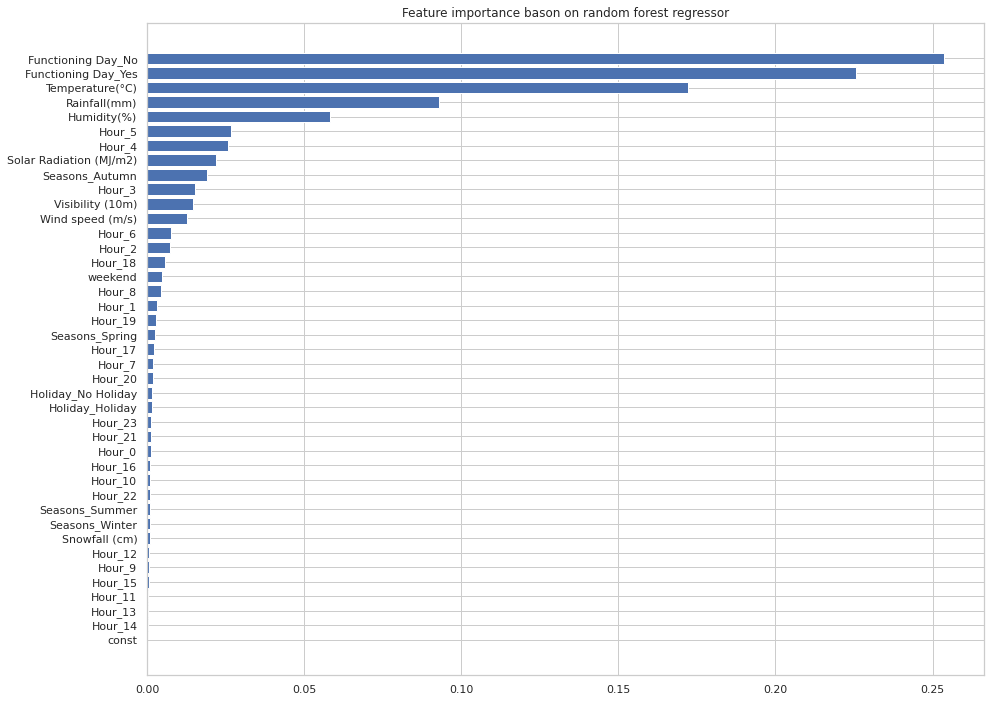

In [ ]:
# Plotting feature importance for random forest regressor
plt.figure(figsize = (15, 12))
feat_imp_rf = pd.DataFrame({'feature':X_train.columns, 'importance':rf_reg.feature_importances_}).sort_values(by = 'importance' , ascending = True)
plt.barh(feat_imp_rf['feature'], feat_imp_rf['importance'])
plt.title('Feature importance bason on random forest regressor')
plt.show()

**GradientBoosting regression**

In [ ]:
# Fitting the data into Gradient Boosting regressor model
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
# Evaluation metrics of training and testing datasets
metrics(gb_reg)

The evaluation metrics for training dataset.....


Metric   value
0                r2_score 0.91641
1       Mean Square Error 0.20922
2  Root mean square error 0.45741
3             Adjusted r2 0.91588
4     Mean absolute error 0.32379

	
	
The evaluation metrics for test dataset.....


Metric   value
0                r2_score 0.91248
1       Mean Square Error 0.22957
2  Root mean square error 0.47913
3             Adjusted r2 0.91077
4     Mean absolute error 0.33309

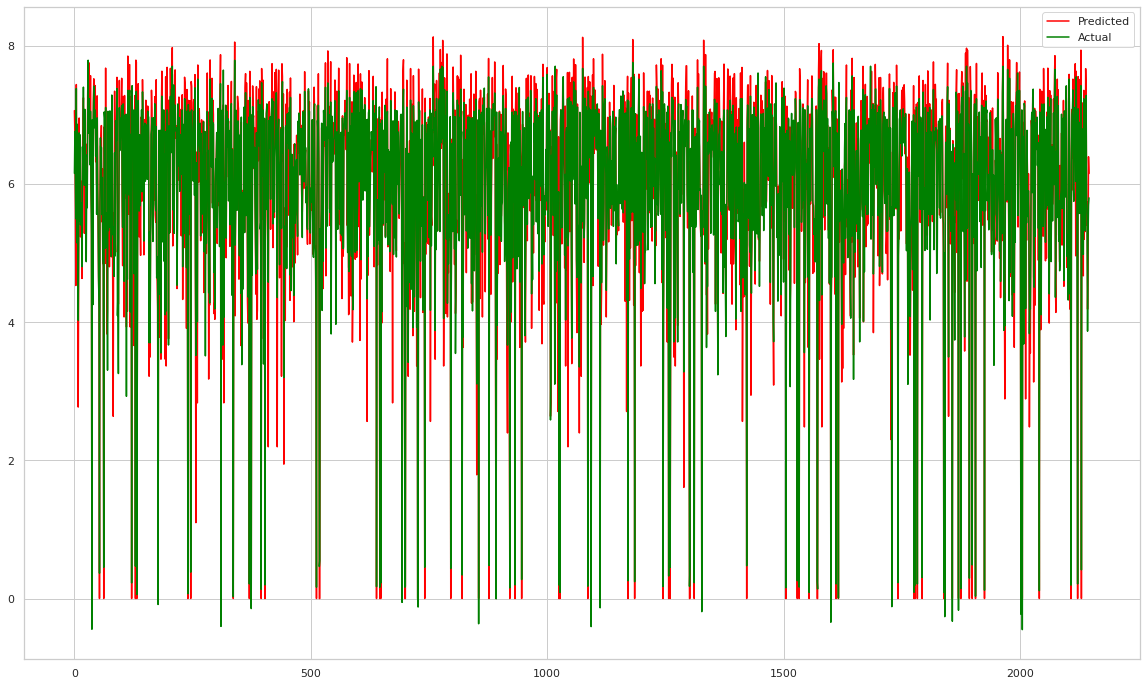

In [ ]:
# Plotting the actual and predicted values of the model
actual_pred(gb_reg)

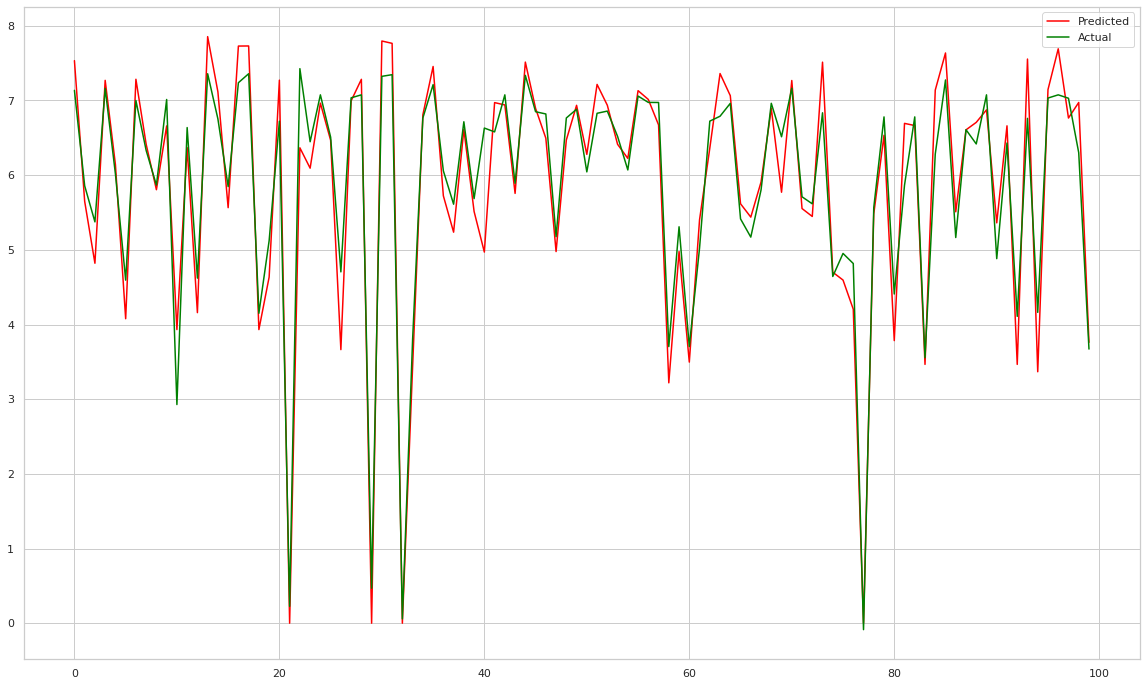

In [ ]:
actual_pred_few(gb_reg
                )

By fiiting the data into Gradient boosting regressor model, we get the 


*   score of training dataset :  0.915247
*   score of testing dataset : 0.911840









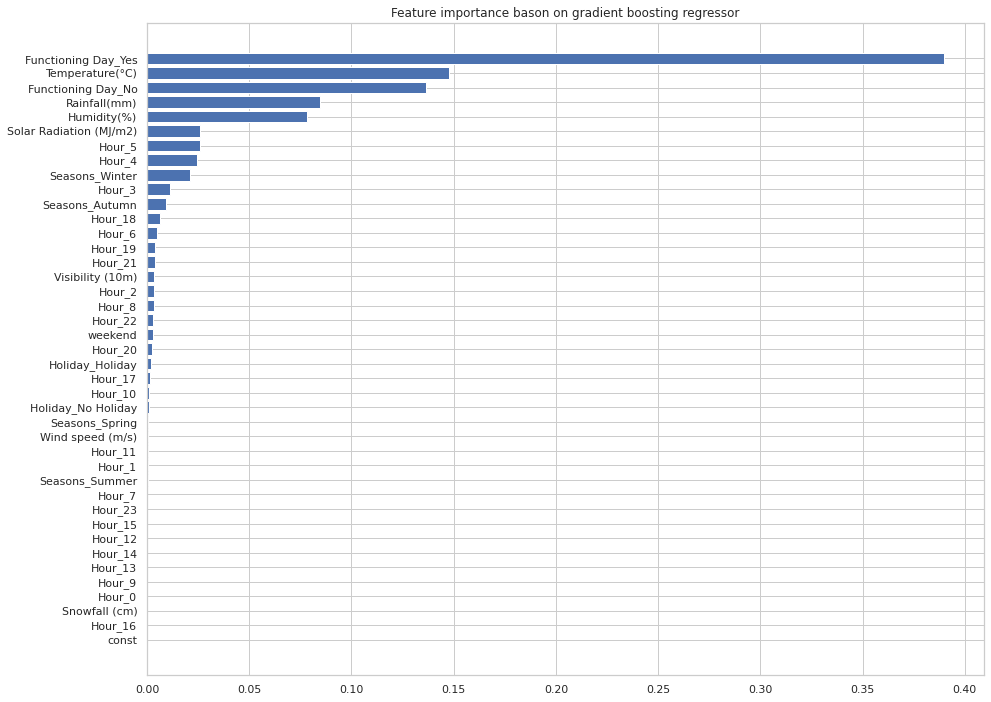

In [ ]:
# Plotting feature importance for gradient boosting regressor
plt.figure(figsize = (15, 12))
feat_imp_gb = pd.DataFrame({'feature':X_train.columns, 'importance':gb_reg.feature_importances_}).sort_values(by = 'importance' , ascending = True)
plt.barh(feat_imp_gb['feature'], feat_imp_gb['importance'])
plt.title('Feature importance bason on gradient boosting regressor')
plt.show()

**XGBoost Regressor**

In [ ]:
# Fitting the data into XGBoost regressor model
import xgboost
from xgboost import XGBRegressor
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)

[11:53:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
# Evaluation metrics of training and testing datasets
metrics(xgb_reg)

The evaluation metrics for training dataset.....


Metric   value
0                r2_score 0.91670
1       Mean Square Error 0.20851
2  Root mean square error 0.45663
3             Adjusted r2 0.91617
4     Mean absolute error 0.32319

	
	
The evaluation metrics for test dataset.....


Metric   value
0                r2_score 0.91223
1       Mean Square Error 0.23022
2  Root mean square error 0.47982
3             Adjusted r2 0.91052
4     Mean absolute error 0.33356

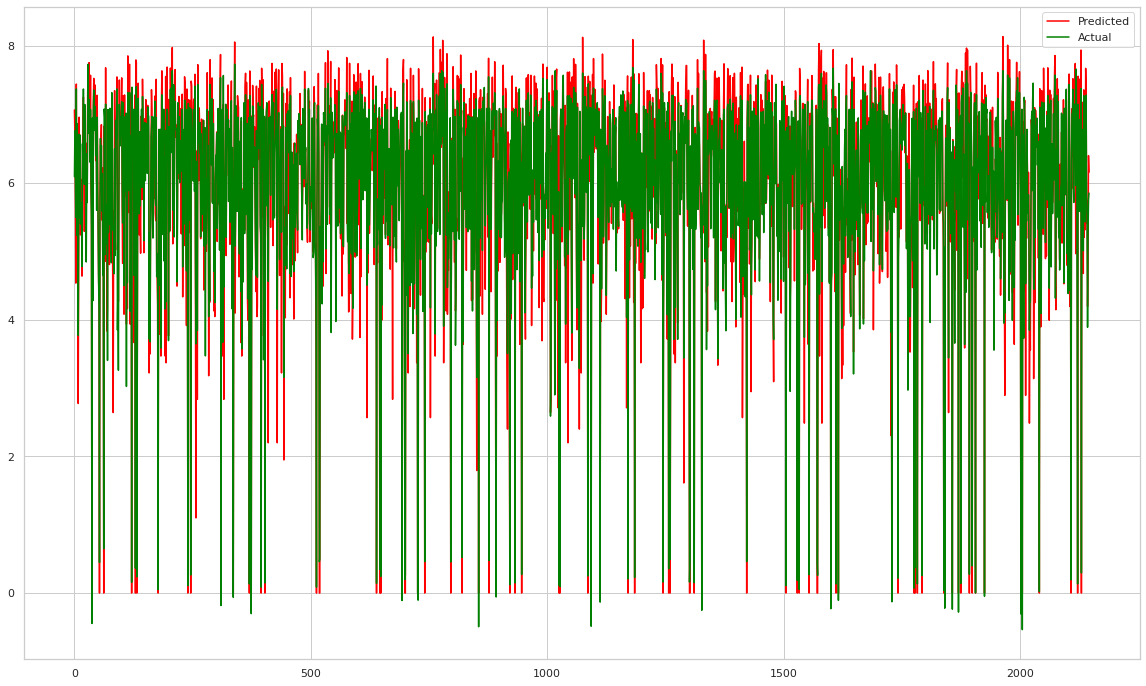

In [ ]:
# Plottting actual and predicted values 
actual_pred(xgb_reg)

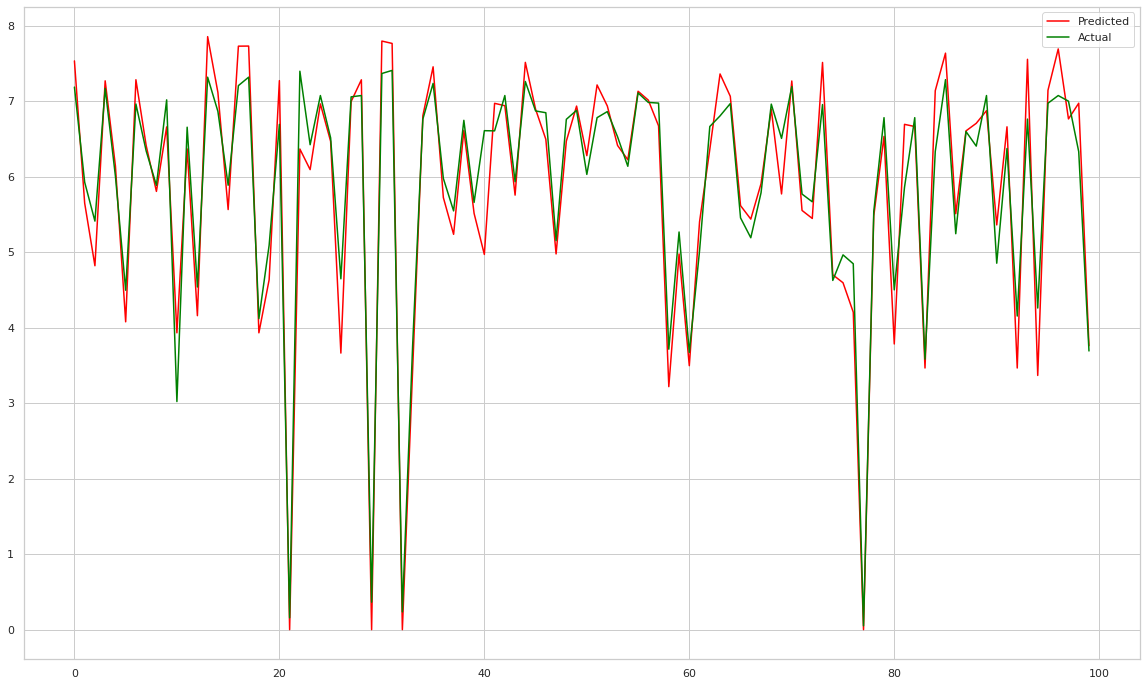

In [ ]:
actual_pred_few(xgb_reg)

By fiiting the data into XGBoost regressor model, we get the 


*   score of training dataset :  0.915889
*   score of testing dataset : 0.914801









From the above all observations, we can see the optimal model is XGboost regressor and Gradient boosting regressor because those only have required score(no overfitting and no underfitting).

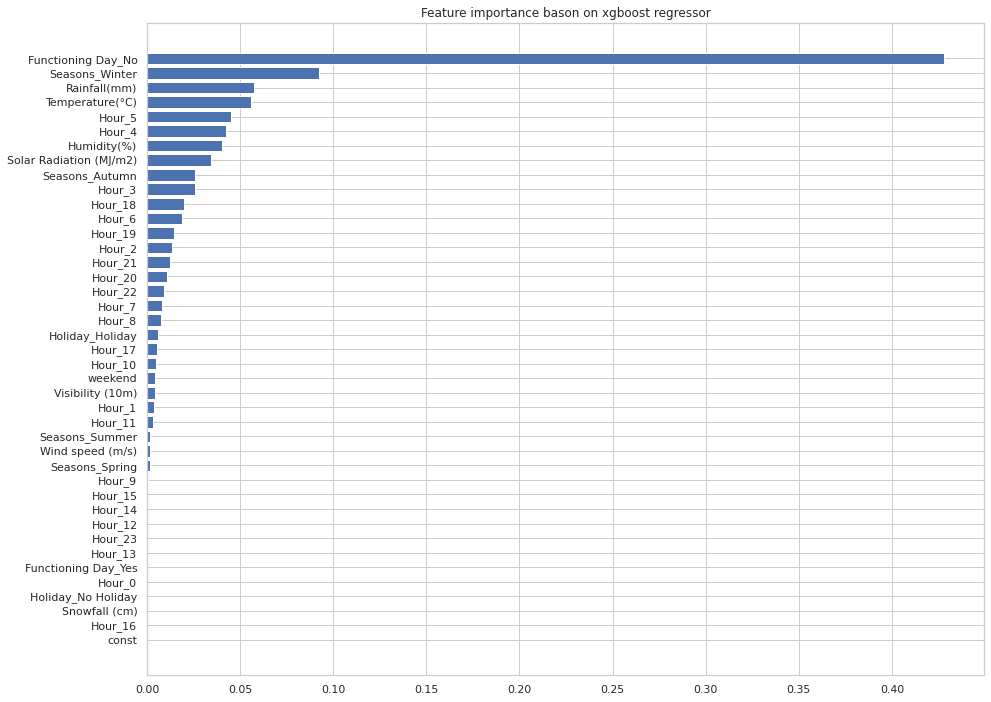

In [ ]:
# Plotting feature importance for xgboost regressor
plt.figure(figsize = (15, 12))
feat_imp_df = pd.DataFrame({'feature':X_train.columns, 'importance':xgb_reg.feature_importances_}).sort_values(by = 'importance' , ascending = True)
plt.barh(feat_imp_df['feature'], feat_imp_df['importance'])
plt.title('Feature importance bason on xgboost regressor')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
def cv_score(model):
  cvs = cross_val_score(model, X_test, y_test, cv = 5).mean()
  return cvs

In [ ]:
cv_score(lin_model)

0.8092268824125375

In [ ]:
cv_score(lasso_reg)

-0.4932886738283952

In [ ]:
cv_score(ridge_reg)

-0.5118609291727485

In [ ]:
cv_score(des_tree_reg)

0.8328817040799296

In [ ]:
cv_score(rf_reg)

0.9131777037435785

In [ ]:
cv_score(gb_reg)

0.9060175472394858

In [ ]:
cv_score(xgb_reg)

[11:53:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:53:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:53:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:53:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:53:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9060333335601369